In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
# Load the data
df = pd.read_csv('used_cars_data.csv')

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [6]:
df.shape

(7253, 14)

In [7]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


## Part 1: Data cleaning

### 1.1 Remove the following columns: ‘S.No’ and ‘New_Price’.

In [10]:
# Remove 'S.No' and 'New_Price' columns
df = df.drop(['S.No.', 'New_Price'], axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### 1.2 create ‘Car_Age’ feature which is defined as the difference between the current year and the year the car was built. E.g. “Car_Age” for the first record is 14.

In [12]:
import datetime

In [13]:
# Create 'Car_Age' feature
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

In [14]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


### 1.3 There are two records for Electric vehicles. The corresponding mileage columns are empty. Please search internet what will be the reasonable value and fill out it. Please provide the logics with the reference.

In [16]:
# checking missing values for all the columns 
missing_values = df.isnull().sum()

# count of missing values
missing_values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
Car_Age                 0
dtype: int64

In [17]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


#For Mahindra E Verito D4	, as it is EV, per full charge the vehical can travel 140km. and the battery capacity is 18.55 KWh. 
https://www.carwale.com/mahindra-cars/verito/e-d4-2016-2019/ 
carwale is the website where cars sell in india

#for Toyota Prius 2009-2016 Z4 , as it is hybrid car (electric and fuel type) based on the research the mileage for the car is 23.91kmpl. here am providing the reference. https://www.cardekho.com/toyota/prius-2009-2016 
WS

In [19]:
# Set a mileage value for Mahindra E Verito D4 with unit
ev_mileage_value = '140 km/charge'  # in km per charge

# Fill the mileage for Mahindra E Verito D4 where it's missing
df.loc[(df['Name'] == 'Mahindra E Verito D4') & (df['Mileage'].isnull()), 'Mileage'] = ev_mileage_value

# Check the updated DataFrame
df[df['Name'] == 'Mahindra E Verito D4']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,140 km/charge,72 CC,41 bhp,5.0,13.0,8


In [20]:
# Set a mileage value for Toyota Prius 2009-2016 Z4 with unit
prius_mileage_value = '23.91 kmpl' # in kmpl

# Fill the mileage for Toyota Prius where it's missing
df.loc[(df['Name'] == 'Toyota Prius 2009-2016 Z4') & (df['Mileage'].isnull()), 'Mileage'] = prius_mileage_value

# Check the updated DataFrame
df[df['Name'] == 'Toyota Prius 2009-2016 Z4']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,23.91 kmpl,1798 CC,73 bhp,5.0,12.75,13


In [21]:
# Check the updated DataFrame
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,140 km/charge,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,23.91 kmpl,1798 CC,73 bhp,5.0,12.75,13


In [22]:
#after the imputation of values the count of missing values
# checking missing values for all the columns 
missing_values = df.isnull().sum()

# count of missing values
missing_values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                  53
Price                1234
Car_Age                 0
dtype: int64

## Part 2: Transformation

### 2.1 Among the columns in the dataset, the python datatype of the ‘Mileage’, ‘Engine’, and ‘Power’ columns are ‘object’. Please convert them to numerical datatype. Remove the unit and convert the string to a numerical value (floating point or integer)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [26]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Car_Age                int64
dtype: object

In [27]:
# Function to extract the unit, with error handling
def extract_unit(value):
    if isinstance(value, str):
        # Split the string by space and return the last element
        return value.split()[-1]
    else:
        return np.nan  # Return NaN for non-string types

# Create temporary columns for units
df['Mileage_Unit'] = df['Mileage'].apply(extract_unit)
df['Engine_Unit'] = df['Engine'].apply(extract_unit)
df['Power_Unit'] = df['Power'].apply(extract_unit)

# Display the updated DataFrame
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14,km/kg,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9,kmpl,CC,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11,kmpl,CC,bhp


In [28]:
# Calculate counts of each unique value in the unit columns
mileage_counts = df['Mileage_Unit'].value_counts()

# Display the counts
print("Mileage Counts:\n", mileage_counts)

Mileage Counts:
 Mileage_Unit
kmpl         7178
km/kg          74
km/charge       1
Name: count, dtype: int64


In [29]:
# Calculate counts of each unique value in the unit columns
engine_counts = df['Engine_Unit'].value_counts()

# Display the counts
print("\nEngine Counts:\n", engine_counts)


Engine Counts:
 Engine_Unit
CC    7207
Name: count, dtype: int64


In [30]:
# Calculate counts of each unique value in the unit columns
power_counts = df['Power_Unit'].value_counts()

# Display the counts
print("\nPower Counts:\n", power_counts)


Power Counts:
 Power_Unit
bhp    7207
Name: count, dtype: int64


In [31]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14,km/kg,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9,kmpl,CC,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11,kmpl,CC,bhp


In [32]:
def unit_mileage(mileage):
    if pd.isna(mileage):
        return np.nan
    if 'km/charge' in mileage:
        return float(mileage.replace(' km/charge', '')) / 2.0  # Convert km/charge to kmpl
    elif 'km/kg' in mileage:
        return float(mileage.replace(' km/kg', '')) * 1.39  # Convert km/kg to kmpl using 1.4
    elif 'kmpl' in mileage:
        return float(mileage.replace(' kmpl', ''))  
    return np.nan

# Apply the function to the Mileage column
df['Mileage'] = df['Mileage'].apply(unit_mileage)

#Mileage conversion from km/charge to kmpl i have gone though these web pages https://epact.energy.gov/fuel-conversion-factors where it explained energy content of fuels. Us dept of energy stated that 1 litre of petrol can have energy of 8.9kwh. here for the mahindra E verigo D4 EV car has battary capacity of 18.55 KwH . This means full capacity of the car is equivalent to 2 lits of petrol. and the car will run 140 km per full charge. to convert this we have divided by 2 . So as the mileage of EV vehicals is measured in KWh , we have converted this to the equivalent pertol car where mileage is measured in KMPl as our dominant unit in mileage is KMPL.  

#For mileage unit conversion from KMKG to KMPL. we have converted it by multiplying with 1.39 after refering few websites studies conducted on CNG. 
references : https://www.scribd.com/document/559699279/Conversion-of-CNG-liter-to-kg
https://www.sciencedirect.com/science/article/abs/pii/S1359431110002437

In [34]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,36.974,998 CC,58.16 bhp,5.0,1.75,14,km/kg,CC,bhp


In [35]:
df.tail(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0,2148 CC,170 bhp,5.0,NaN,10,kmpl,CC,bhp


In [36]:
# function to convert the units to dominant unit in power column
def power(power):
    if pd.isna(power) or 'null' in str(power):  # first checking for 'null' or missing values
        return np.nan
    if 'kW' in power:
        return float(power.replace(' kW', '')) * 1.341  # Convert kW to bhp using 1.341
    elif 'bhp' in power:
        return float(power.replace(' bhp', ''))  # Remove bhp unit and convert to float
    return np.nan

# function to convert the units to dominant unit in engine column
def engine(engine):
    if pd.isna(engine):
        return np.nan
    return float(engine.replace(' CC', ''))  # Remove 'CC' unit and convert to float

# Apply the cleaning functions to your dataset
df['Power'] = df['Power'].apply(power)
df['Engine'] = df['Engine'].apply(engine)

In [37]:
# checking missing values for all the columns 
missing_values = df.isnull().sum()

# count of missing values
missing_values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
Mileage_Unit            0
Engine_Unit            46
Power_Unit             46
dtype: int64

In [38]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,36.974,998.0,58.16,5.0,1.75,14,km/kg,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50,9,kmpl,CC,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50,13,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00,12,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74,11,kmpl,CC,bhp


In [39]:
df[['Mileage', 'Engine', 'Power']].head(1)

,Mileage,Engine,Power
0,36.974,998.0,58.16


In [40]:
df[['Mileage', 'Engine', 'Power']].dtypes

Mileage    float64
Engine     float64
Power      float64
dtype: object

In [41]:
# Dropping the temporary unit columns
df = df.drop(columns=['Mileage_Unit', 'Engine_Unit', 'Power_Unit'])

# Display the updated DataFrame
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,36.974,998.0,58.16,5.0,1.75,14


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


In [43]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Car_Age                int64
dtype: object

## Part 3: Outlier detection and box-plot

### 3.1 Please check whether the data is in the normal distribution or non-normal distribution for the following numerical columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

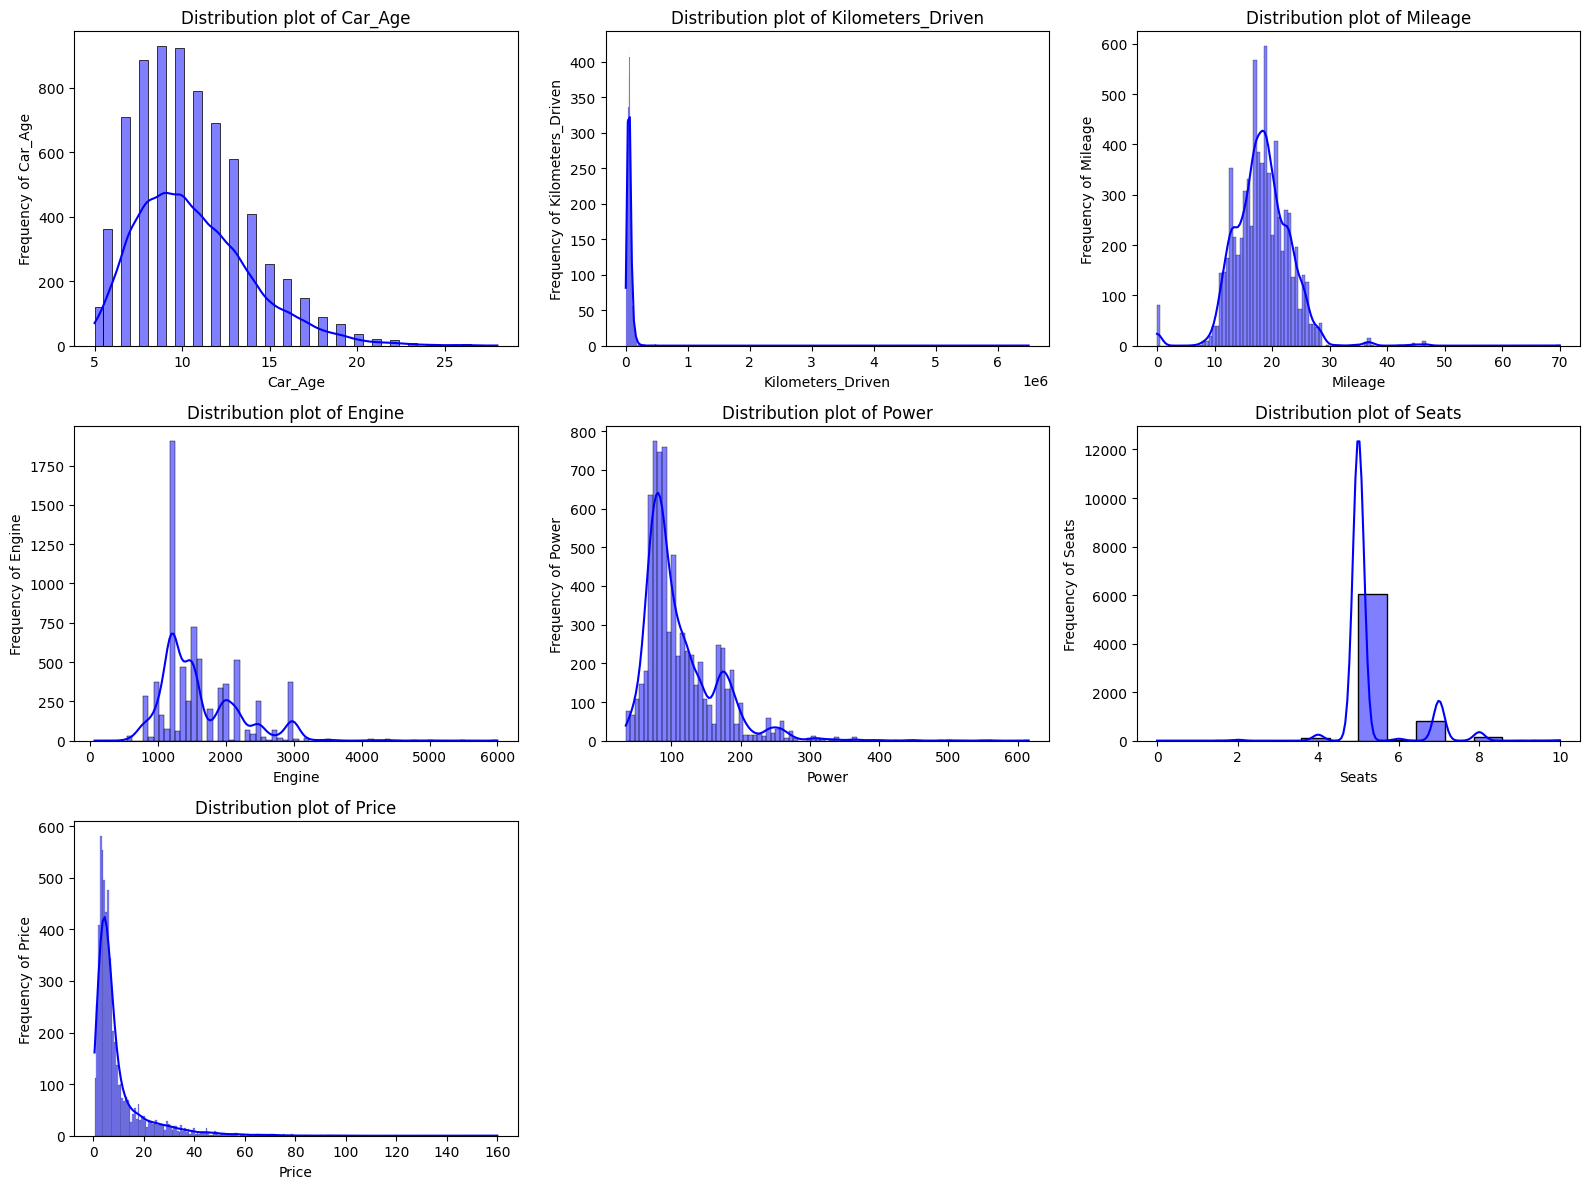

In [46]:
# Creating list for numerical columns
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

plt.figure(figsize=(16, 12))

# for loop to iterate num columns and plot the graph to check distribution
for i, col in enumerate(numerical_columns, start = 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde = True, color = 'blue')
    plt.title(f'Distribution plot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Frequency of {col}')

plt.tight_layout()
plt.show()

1. The car age distribution is not normal. this is right skewed. 
2. kilometer_driven also has a non normal distribution. 
3. Mileage shows partial normal distribution as it is not a perfect bell-shaped curve. 
4. all the other plots like engine, power, seats, and price are not normal distributions. 

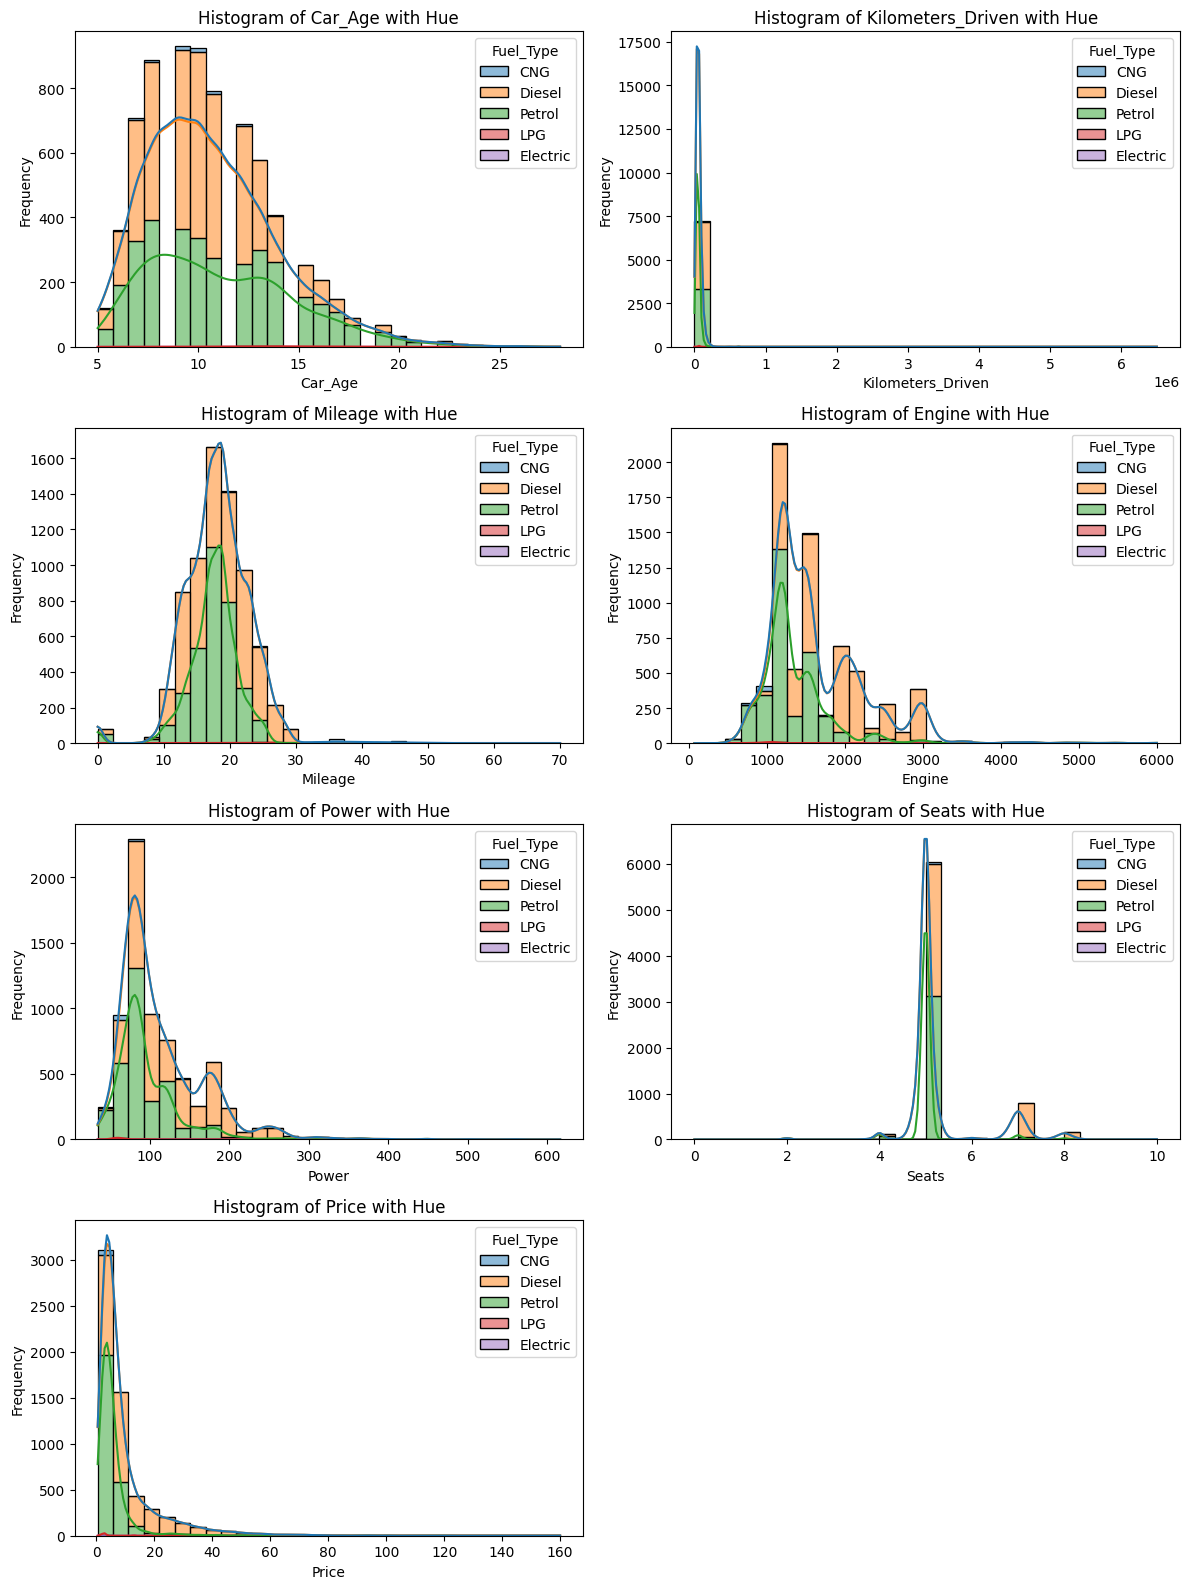

In [48]:
# Numerical columns to check
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Define the categorical column to use as hue (e.g., 'Fuel_Type')
hue_column = 'Fuel_Type'  # Replace with your actual column name

# Create a figure to hold the plots
plt.figure(figsize=(12, 16))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)  # Adjust the subplot grid as needed
    sns.histplot(data=df, x=column, hue=hue_column, bins=30, kde=True, multiple='stack')
    plt.title(f'Histogram of {column} with Hue')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [49]:
# Check for normality using Shapiro-Wilk test
print("Shapiro-Wilk Test Results:")
for column in numerical_columns:
    stat, p_value = stats.shapiro(df[column].dropna())  # Drop NaN values for the test
    print(f"{column}: Statistics={stat:.3f}, p-value={p_value:.3f}")
    alpha = 0.05
    if p_value > alpha:
        print(f" -> {column} looks like a normal distribution (fail to reject H0)")
    else:
        print(f" -> {column} does not look like a normal distribution (reject H0)")

Shapiro-Wilk Test Results:
Car_Age: Statistics=0.951, p-value=0.000
 -> Car_Age does not look like a normal distribution (reject H0)
Kilometers_Driven: Statistics=0.195, p-value=0.000
 -> Kilometers_Driven does not look like a normal distribution (reject H0)
Mileage: Statistics=0.946, p-value=0.000
 -> Mileage does not look like a normal distribution (reject H0)
Engine: Statistics=0.880, p-value=0.000
 -> Engine does not look like a normal distribution (reject H0)
Power: Statistics=0.842, p-value=0.000
 -> Power does not look like a normal distribution (reject H0)
Seats: Statistics=0.498, p-value=0.000
 -> Seats does not look like a normal distribution (reject H0)
Price: Statistics=0.641, p-value=0.000
 -> Price does not look like a normal distribution (reject H0)


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7253.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7207.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7078.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7200.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: Use

### We observe that most of columns given above are not in normal distribution type. So we use IQR method to find outliers.

In [51]:
# checking missing values for all the columns 
missing_values = df.isnull().sum()

# count of missing values
missing_values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
dtype: int64

### 3.2 Please detect outliers based on the data distribution type. For outlier detection, please calculate step by step. Please count(print) how many outliers for each column. 

In [53]:
# Initialize a dictionary to store outlier counts
outlier_counts = {}

# Detect outliers using the IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    outlier_counts[column] = outlier_count

# Print the number of outliers for each column
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

Car_Age: 58 outliers
Kilometers_Driven: 258 outliers
Mileage: 133 outliers
Engine: 65 outliers
Power: 273 outliers
Seats: 1153 outliers
Price: 718 outliers


#### Car_Age

In [55]:
# Calculate Q1, Q3, and IQR for the Car_Age column
Q1 = df['Car_Age'].quantile(0.25)  # First quartile
Q3 = df['Car_Age'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Car_Age'] < lower_bound]
upper_bound_outliers = df[df['Car_Age'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Car_Age'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Car_Age'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Car_Age'])

Total outliers in 'Car_Age': 58
Lower bound outliers count: 0
Upper bound outliers count: 58

Lower bound outliers:
Series([], Name: Car_Age, dtype: int64)

Upper bound outliers:
274     22
315     24
364     21
613     24
631     22
911     21
1221    21
1224    25
1318    22
1845    25
1903    22
1907    22
1999    23
2487    21
2524    21
2554    22
2656    22
2737    23
3138    26
3189    22
3221    22
3228    21
3749    26
3806    23
3854    21
3942    22
3963    23
4143    21
4152    21
4351    21
4629    23
4658    21
4709    26
4712    21
4730    21
4791    21
4822    22
4863    23
5040    21
5137    24
5270    22
5432    22
5453    23
5643    21
5647    23
5657    22
5716    26
5914    21
5926    24
5943    22
6194    21
6216    28
6454    22
6576    22
6753    24
6875    22
6986    21
7138    21
Name: Car_Age, dtype: int64


#### Kilometers_Driven

In [57]:
# Calculate Q1, Q3, and IQR for the Kilometers_Driven column
Q1 = df['Kilometers_Driven'].quantile(0.25)  # First quartile
Q3 = df['Kilometers_Driven'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Kilometers_Driven'] < lower_bound]
upper_bound_outliers = df[df['Kilometers_Driven'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Kilometers_Driven'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Kilometers_Driven'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Kilometers_Driven'])

Total outliers in 'Kilometers_Driven': 258
Lower bound outliers count: 0
Upper bound outliers count: 258

Lower bound outliers:
Series([], Name: Kilometers_Driven, dtype: int64)

Upper bound outliers:
29      262000
64      178000
77      230000
154     136997
164     147898
         ...  
7183    137711
7198    147202
7200    190000
7213    170000
7227    160000
Name: Kilometers_Driven, Length: 258, dtype: int64


#### Mileage

In [59]:
# Calculate Q1, Q3, and IQR for the Mileage column
Q1 = df['Mileage'].quantile(0.25)  # First quartile
Q3 = df['Mileage'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Mileage'] < lower_bound]
upper_bound_outliers = df[df['Mileage'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Mileage'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Mileage'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Mileage'])

Total outliers in 'Mileage': 133
Lower bound outliers count: 82
Upper bound outliers count: 51

Lower bound outliers:
14      0.0
67      0.0
79      0.0
194     0.0
229     0.0
       ... 
6633    0.0
6697    0.0
6857    0.0
6957    0.0
7226    0.0
Name: Mileage, Length: 82, dtype: float64

Upper bound outliers:
0       36.9740
127     36.9740
328     36.5570
839     37.2937
936     36.4180
1135    36.5570
1218    36.4180
1269    46.4816
1332    46.6206
1357    36.9740
1780    36.9740
1911    36.9740
1914    34.7500
2059    46.6206
2110    34.1940
2323    34.7500
2371    46.6206
2376    36.9740
2437    34.1940
2516    30.7190
2638    36.4180
2701    44.1881
3008    36.9740
3031    31.6920
3097    36.4180
3119    44.8414
3129    46.6206
3295    36.9740
3455    36.4180
3511    37.2937
3553    46.4816
3722    30.7190
3869    46.4816
4141    46.6206
4411    36.9740
4446    70.0000
4769    46.4816
4920    36.9740
5178    44.1881
5506    36.4180
5655    36.9740
5710    42.3394
5747    36.97

#### Engine

In [61]:
# Calculate Q1, Q3, and IQR for the Engine column
Q1 = df['Engine'].quantile(0.25)  # First quartile
Q3 = df['Engine'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Engine'] < lower_bound]
upper_bound_outliers = df[df['Engine'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Engine'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Engine'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Engine'])

Total outliers in 'Engine': 65
Lower bound outliers count: 0
Upper bound outliers count: 65

Lower bound outliers:
Series([], Name: Engine, dtype: float64)

Upper bound outliers:
70      4806.0
152     5461.0
459     4134.0
586     4134.0
589     3498.0
         ...  
6011    3597.0
6186    3498.0
6354    5998.0
6842    3696.0
7057    4395.0
Name: Engine, Length: 65, dtype: float64


#### Power

In [63]:
# Calculate Q1, Q3, and IQR for the Power column
Q1 = df['Power'].quantile(0.25)  # First quartile
Q3 = df['Power'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Power'] < lower_bound]
upper_bound_outliers = df[df['Power'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Power'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Power'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Power'])

Total outliers in 'Power': 273
Lower bound outliers count: 0
Upper bound outliers count: 273

Lower bound outliers:
Series([], Name: Power, dtype: float64)

Upper bound outliers:
38      254.80
70      500.00
103     241.40
107     270.90
134     362.07
         ...  
7117    360.00
7124    236.00
7156    321.00
7198    241.60
7216    258.00
Name: Power, Length: 273, dtype: float64


#### Seats

In [65]:
# Calculate Q1, Q3, and IQR for the Seats column
Q1 = df['Seats'].quantile(0.25)  # First quartile
Q3 = df['Seats'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Seats'] < lower_bound]
upper_bound_outliers = df[df['Seats'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Seats'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Seats'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Seats'])

Total outliers in 'Seats': 1153
Lower bound outliers count: 138
Upper bound outliers count: 1015

Lower bound outliers:
41      4.0
112     4.0
124     4.0
134     2.0
148     4.0
       ... 
6906    4.0
6960    2.0
7057    4.0
7102    4.0
7194    4.0
Name: Seats, Length: 138, dtype: float64

Upper bound outliers:
3       7.0
7       8.0
15      7.0
29      7.0
32      7.0
       ... 
7169    7.0
7175    7.0
7198    7.0
7206    7.0
7223    7.0
Name: Seats, Length: 1015, dtype: float64


#### Price

In [67]:
# Calculate Q1, Q3, and IQR for the Price column
Q1 = df['Price'].quantile(0.25)  # First quartile
Q3 = df['Price'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Price'] < lower_bound]
upper_bound_outliers = df[df['Price'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Price'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Price'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Price'])

Total outliers in 'Price': 718
Lower bound outliers count: 0
Upper bound outliers count: 718

Lower bound outliers:
Series([], Name: Price, dtype: float64)

Upper bound outliers:
13      27.00
19      28.00
22      23.50
38      28.00
50      21.43
        ...  
5950    21.75
5970    26.76
5996    30.54
6008    45.00
6009    19.75
Name: Price, Length: 718, dtype: float64


In [68]:
from scipy.stats import shapiro

NumColumns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# 1. Calculating the range for each column and performing the Shapiro-Wilk test
for col in NumColumns:
    range = df[col].max() - df[col].min()
    stat, p_value = shapiro(df[col].dropna())
    
    print(f"{col}:")
    print(f"   Range : {range}")
    print(f"   Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    print(f"   {'Normal distribution' if p_value > 0.05 else 'Not Normal distribution'}")
    print("\n")

Car_Age:
   Range : 23
   Shapiro-Wilk Test: Statistic=0.9507486821938141, p-value=5.781548453740063e-44
   Not Normal distribution


Kilometers_Driven:
   Range : 6499829
   Shapiro-Wilk Test: Statistic=0.19456631009943626, p-value=1.04930962470592e-100
   Not Normal distribution


Mileage:
   Range : 70.0
   Shapiro-Wilk Test: Statistic=0.9463204040860678, p-value=2.3386534498050872e-45
   Not Normal distribution


Engine:
   Range : 5926.0
   Shapiro-Wilk Test: Statistic=0.8797719301033762, p-value=2.2511563855513208e-59
   Not Normal distribution


Power:
   Range : 581.8
   Shapiro-Wilk Test: Statistic=0.8419137509737623, p-value=3.0373159343940697e-64
   Not Normal distribution


Seats:
   Range : 10.0
   Shapiro-Wilk Test: Statistic=0.498449071258353, p-value=3.160993759732639e-89
   Not Normal distribution


Price:
   Range : 159.56
   Shapiro-Wilk Test: Statistic=0.6406859757274896, p-value=1.8804936208528862e-77
   Not Normal distribution




/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7253.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7207.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7078.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7200.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: Use

### 3.3 Please draw box-plot for the columns. Please draw box-plot together if the scales of the columns are in similar range. Otherwise, please draw box-plot separately.

### Caluculating range to group for box plots

In [71]:
# Define the numerical columns
NumColumns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
for col in NumColumns:
    column_range = df[col].max() - df[col].min()
    print(f"Range of {col}: {column_range}")

Range of Car_Age: 23
Range of Kilometers_Driven: 6499829
Range of Mileage: 70.0
Range of Engine: 5926.0
Range of Power: 581.8
Range of Seats: 10.0
Range of Price: 159.56


Grouping on range similarity and comparable

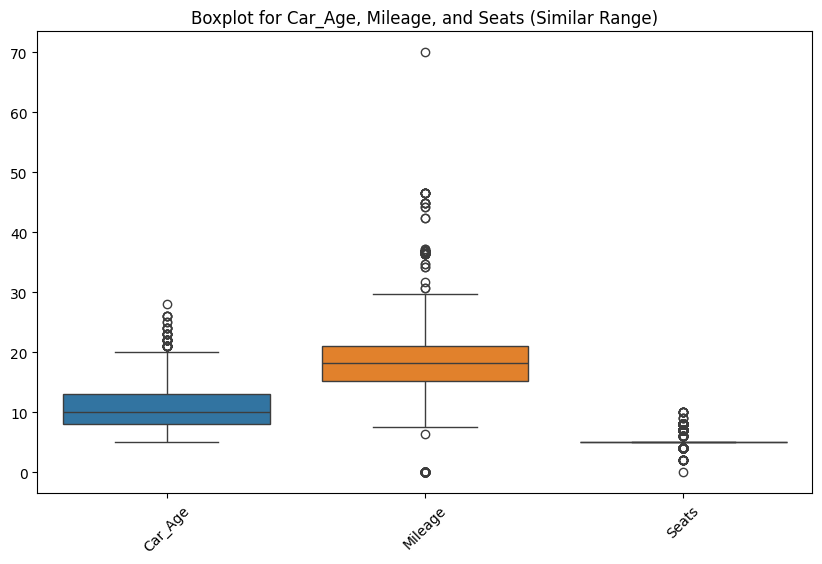

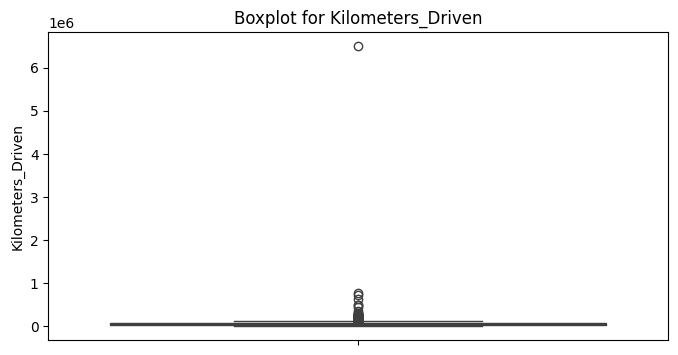

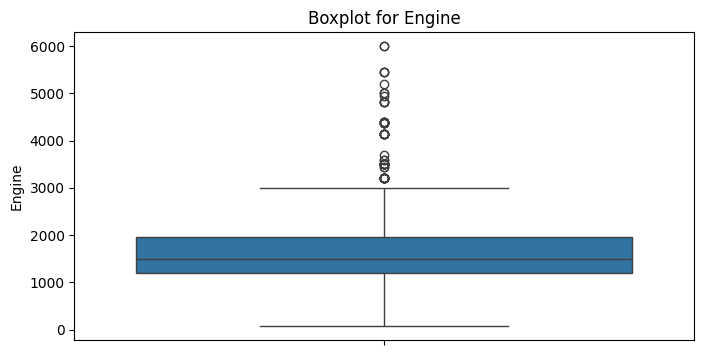

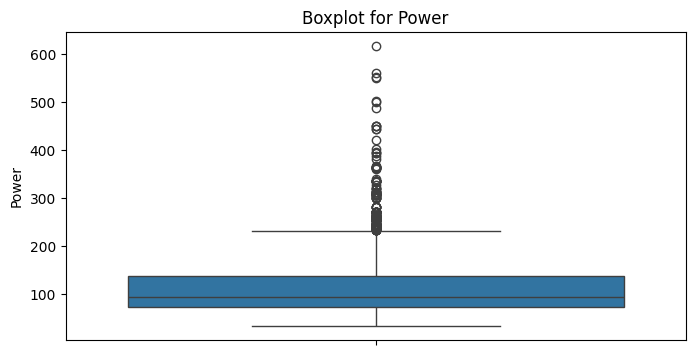

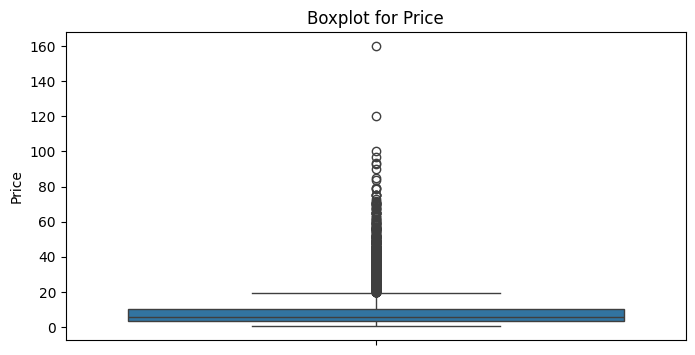

In [73]:
# 1: box plot together for Car_Age, Mileage, Seats columns as in same scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Car_Age', 'Mileage', 'Seats']])
plt.title("Boxplot for Car_Age, Mileage, and Seats (Similar Range)")
plt.xticks(rotation=45)
plt.show()

# 2:box plots separately due to larger scales for columns Kilometers_Driven, Engine, Power, Price
for col in ['Kilometers_Driven', 'Engine', 'Power', 'Price']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

### We have plotted box plots in the same scale for car_age, Mileage, and seats as the range values of these columns are close by. We have plotted for the other columns separately as their range values are not any near to each other. We also can see the outliers for all these numerical columns through these boxplots. We observe for seats that median is 5 and the upper quartile and lower quartile also is 5

### 3.4 draw box-plot for ‘Mileage’ with ‘Fuel_Type’.

/var/folders/mz/l3lbw4h95l36t184_ybct9vr0000gn/T/ipykernel_92990/745618637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Mileage', palette='Set2', showfliers=True)


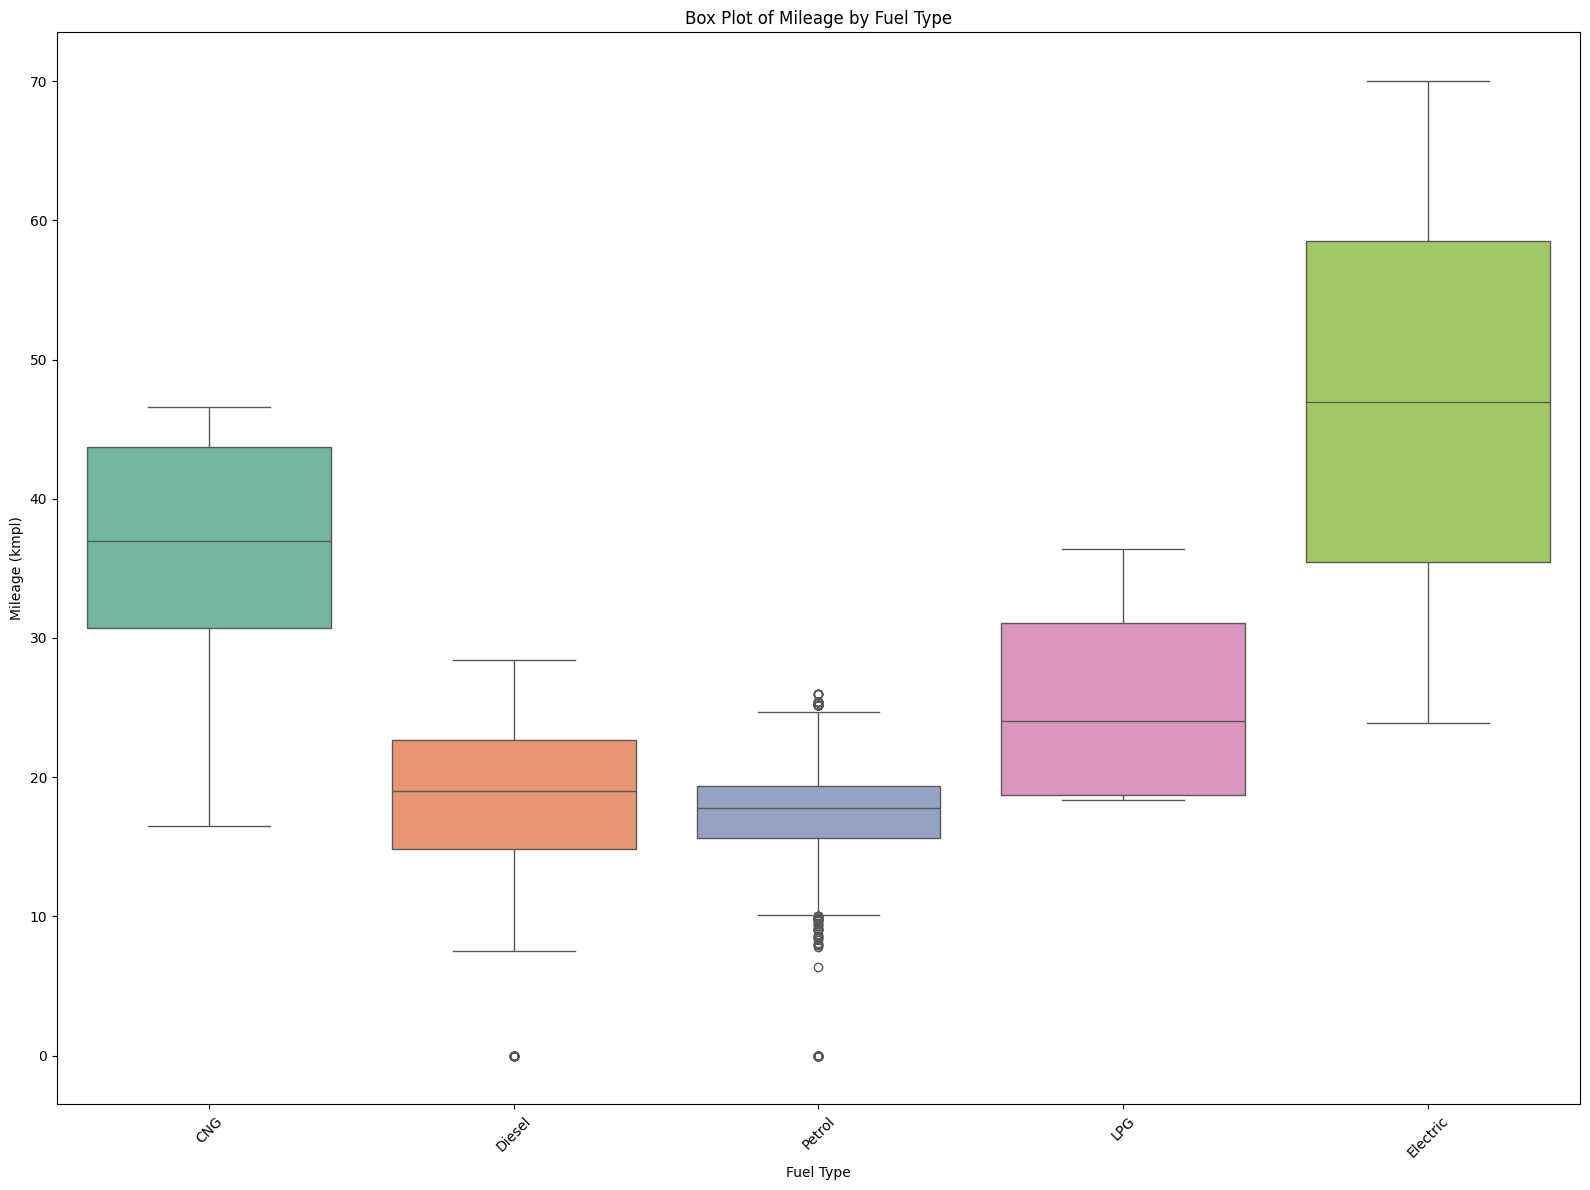

In [76]:
# Create a box plot for Mileage with Fuel_Type as hue
plt.figure(figsize=(16, 12))
sns.boxplot(data=df, x='Fuel_Type', y='Mileage', palette='Set2', showfliers=True)
plt.title('Box Plot of Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (kmpl)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
# checking missing values for all the columns 
missing_values = df.isnull().sum()

# count of missing values
missing_values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
dtype: int64

## Part 4. Pearson correlation coefficient and scatter plot

#### 4.1 Please calculate Pearson correlation coefficient between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’.

In [80]:
df.shape

(7253, 13)

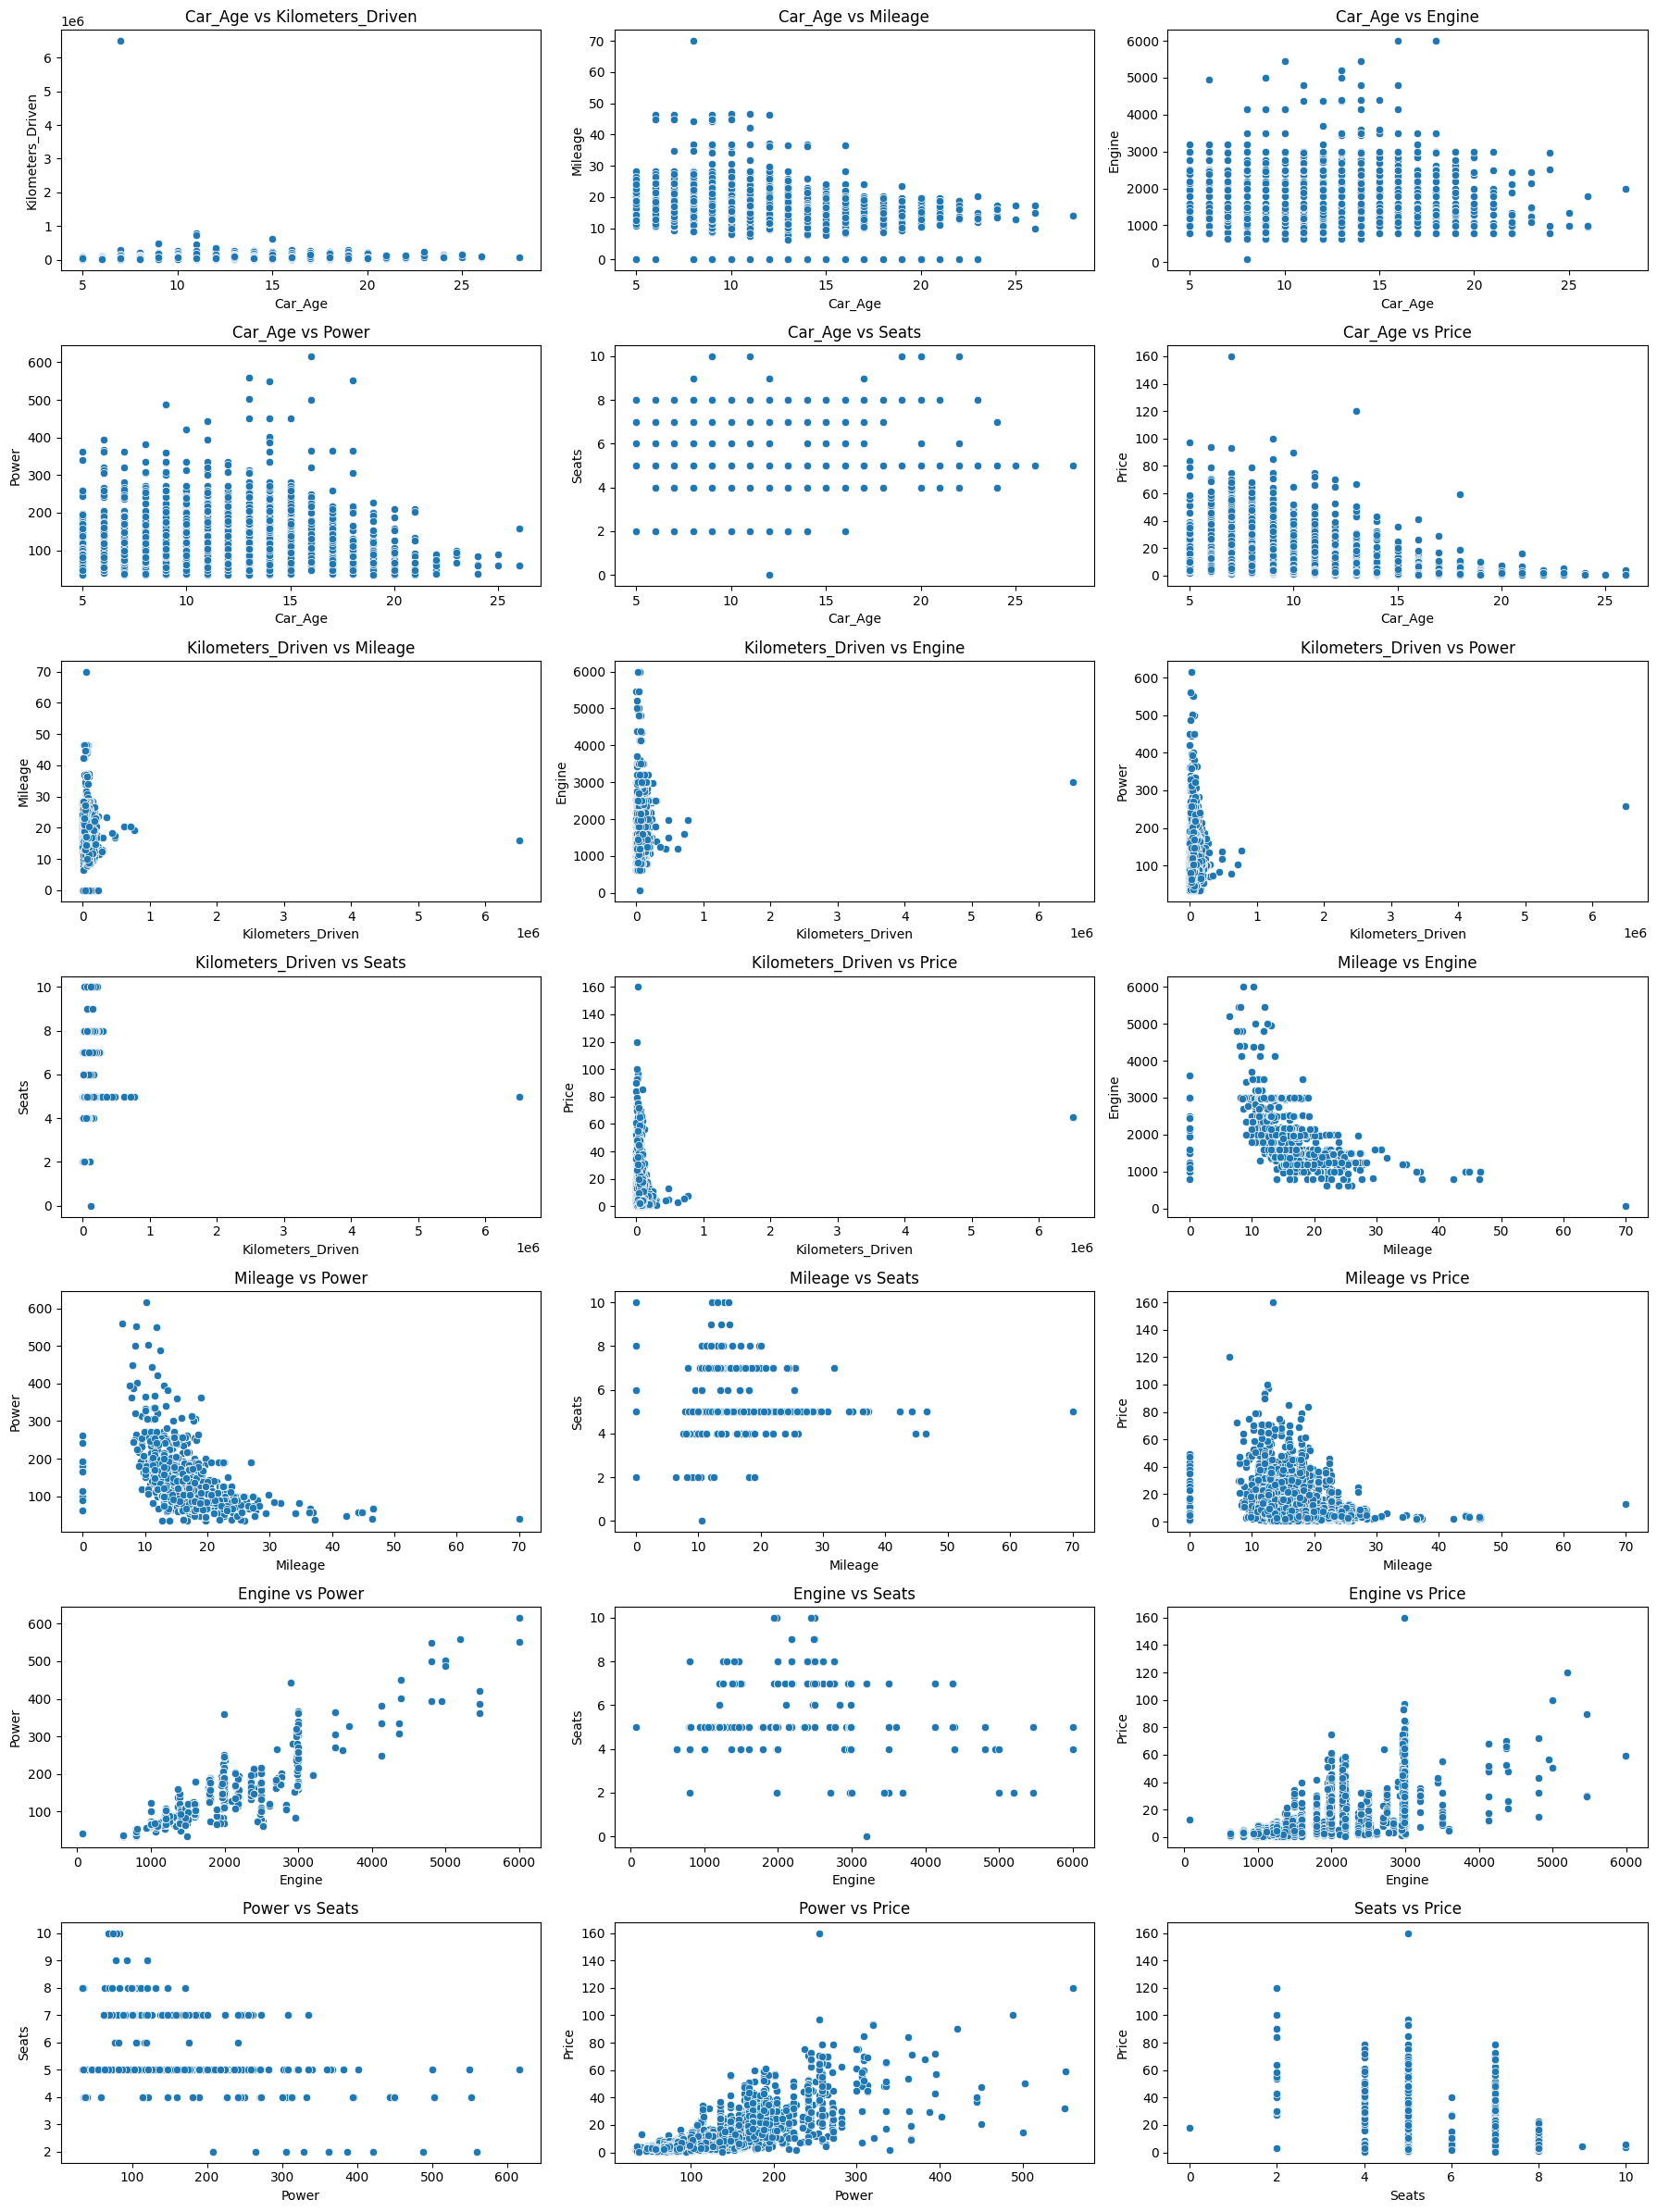

In [81]:
# List of numerical columns
NumColumns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Function to plot scatter plots in a grid (before excluding outliers)
def plot_scatter_before_outliers(data):
    # Create a grid with appropriate rows and columns for 21 plots (e.g., 7 rows x 3 columns)
    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 24))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    plot_count = 0

    for i, col1 in enumerate(NumColumns):
        for col2 in NumColumns[i+1:]:
            if plot_count < 21:
                sns.scatterplot(x=data[col1], y=data[col2], ax=axes[plot_count])
                axes[plot_count].set_title(f'{col1} vs {col2}')
                axes[plot_count].set_xlabel(col1)
                axes[plot_count].set_ylabel(col2)
                plot_count += 1

    # Adjust layout so titles and labels don’t overlap
    plt.tight_layout()
    plt.show()

# Call the function with your dataframe
plot_scatter_before_outliers(df)

In [82]:
# step1. IQR method to remove outliers  
def iqr(data, col):
    Q1 = data[col].quantile(0.25) #1st quartile
    Q3 = data[col].quantile(0.75) #3rd quartile 
    IQR = Q3 - Q1 # Finding Interquartile range 
    lower_bound = Q1 - 1.5 * IQR # lower bound
    upper_bound = Q3 + 1.5 * IQR # upper bound
    
#     # Impute outliers with the median of the column
#     median_value = data[col].median()
#     data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median_value, data[col])
    # Remove rows where the column value is an outlier
    return data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
NumColumns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Step 2: removing outliers in each numerical col
df_filtered = df.copy()
for col in NumColumns:
    df_filtered=iqr(df_filtered, col)

In [83]:
df_filtered.shape

(5079, 13)

### 4.2 Please draw scatterplots between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please include the coefficient value inside of the figures.

In [85]:
# List of numerical columns
NumColumns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Function to calculate Pearson correlation coefficient
def pearson_corr_coeff(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    
    if denominator == 0: 
        return 0
    return numerator / denominator

# Function to print Pearson correlation coefficients
def print_pearson_correlations(data):
    print("Pearson Correlation Coefficients:")
    for i, col1 in enumerate(NumColumns):
        for col2 in NumColumns[i+1:]:
            x = data[col1]
            y = data[col2]
            r = pearson_corr_coeff(x, y)
            print(f"Correlation between '{col1}' and '{col2}': {r:.4f}")

# Call the function with your dataframe
print_pearson_correlations(df_filtered)

Pearson Correlation Coefficients:
Correlation between 'Car_Age' and 'Kilometers_Driven': 0.5241
Correlation between 'Car_Age' and 'Mileage': -0.4178
Correlation between 'Car_Age' and 'Engine': 0.2071
Correlation between 'Car_Age' and 'Power': 0.1208
Correlation between 'Car_Age' and 'Seats': 0.0000
Correlation between 'Car_Age' and 'Price': -0.4211
Correlation between 'Kilometers_Driven' and 'Mileage': -0.0978
Correlation between 'Kilometers_Driven' and 'Engine': 0.2351
Correlation between 'Kilometers_Driven' and 'Power': 0.1259
Correlation between 'Kilometers_Driven' and 'Seats': 0.0000
Correlation between 'Kilometers_Driven' and 'Price': -0.1936
Correlation between 'Mileage' and 'Engine': -0.4848
Correlation between 'Mileage' and 'Power': -0.4951
Correlation between 'Mileage' and 'Seats': 0.0000
Correlation between 'Mileage' and 'Price': -0.0514
Correlation between 'Engine' and 'Power': 0.8885
Correlation between 'Engine' and 'Seats': 0.0000
Correlation between 'Engine' and 'Price': 

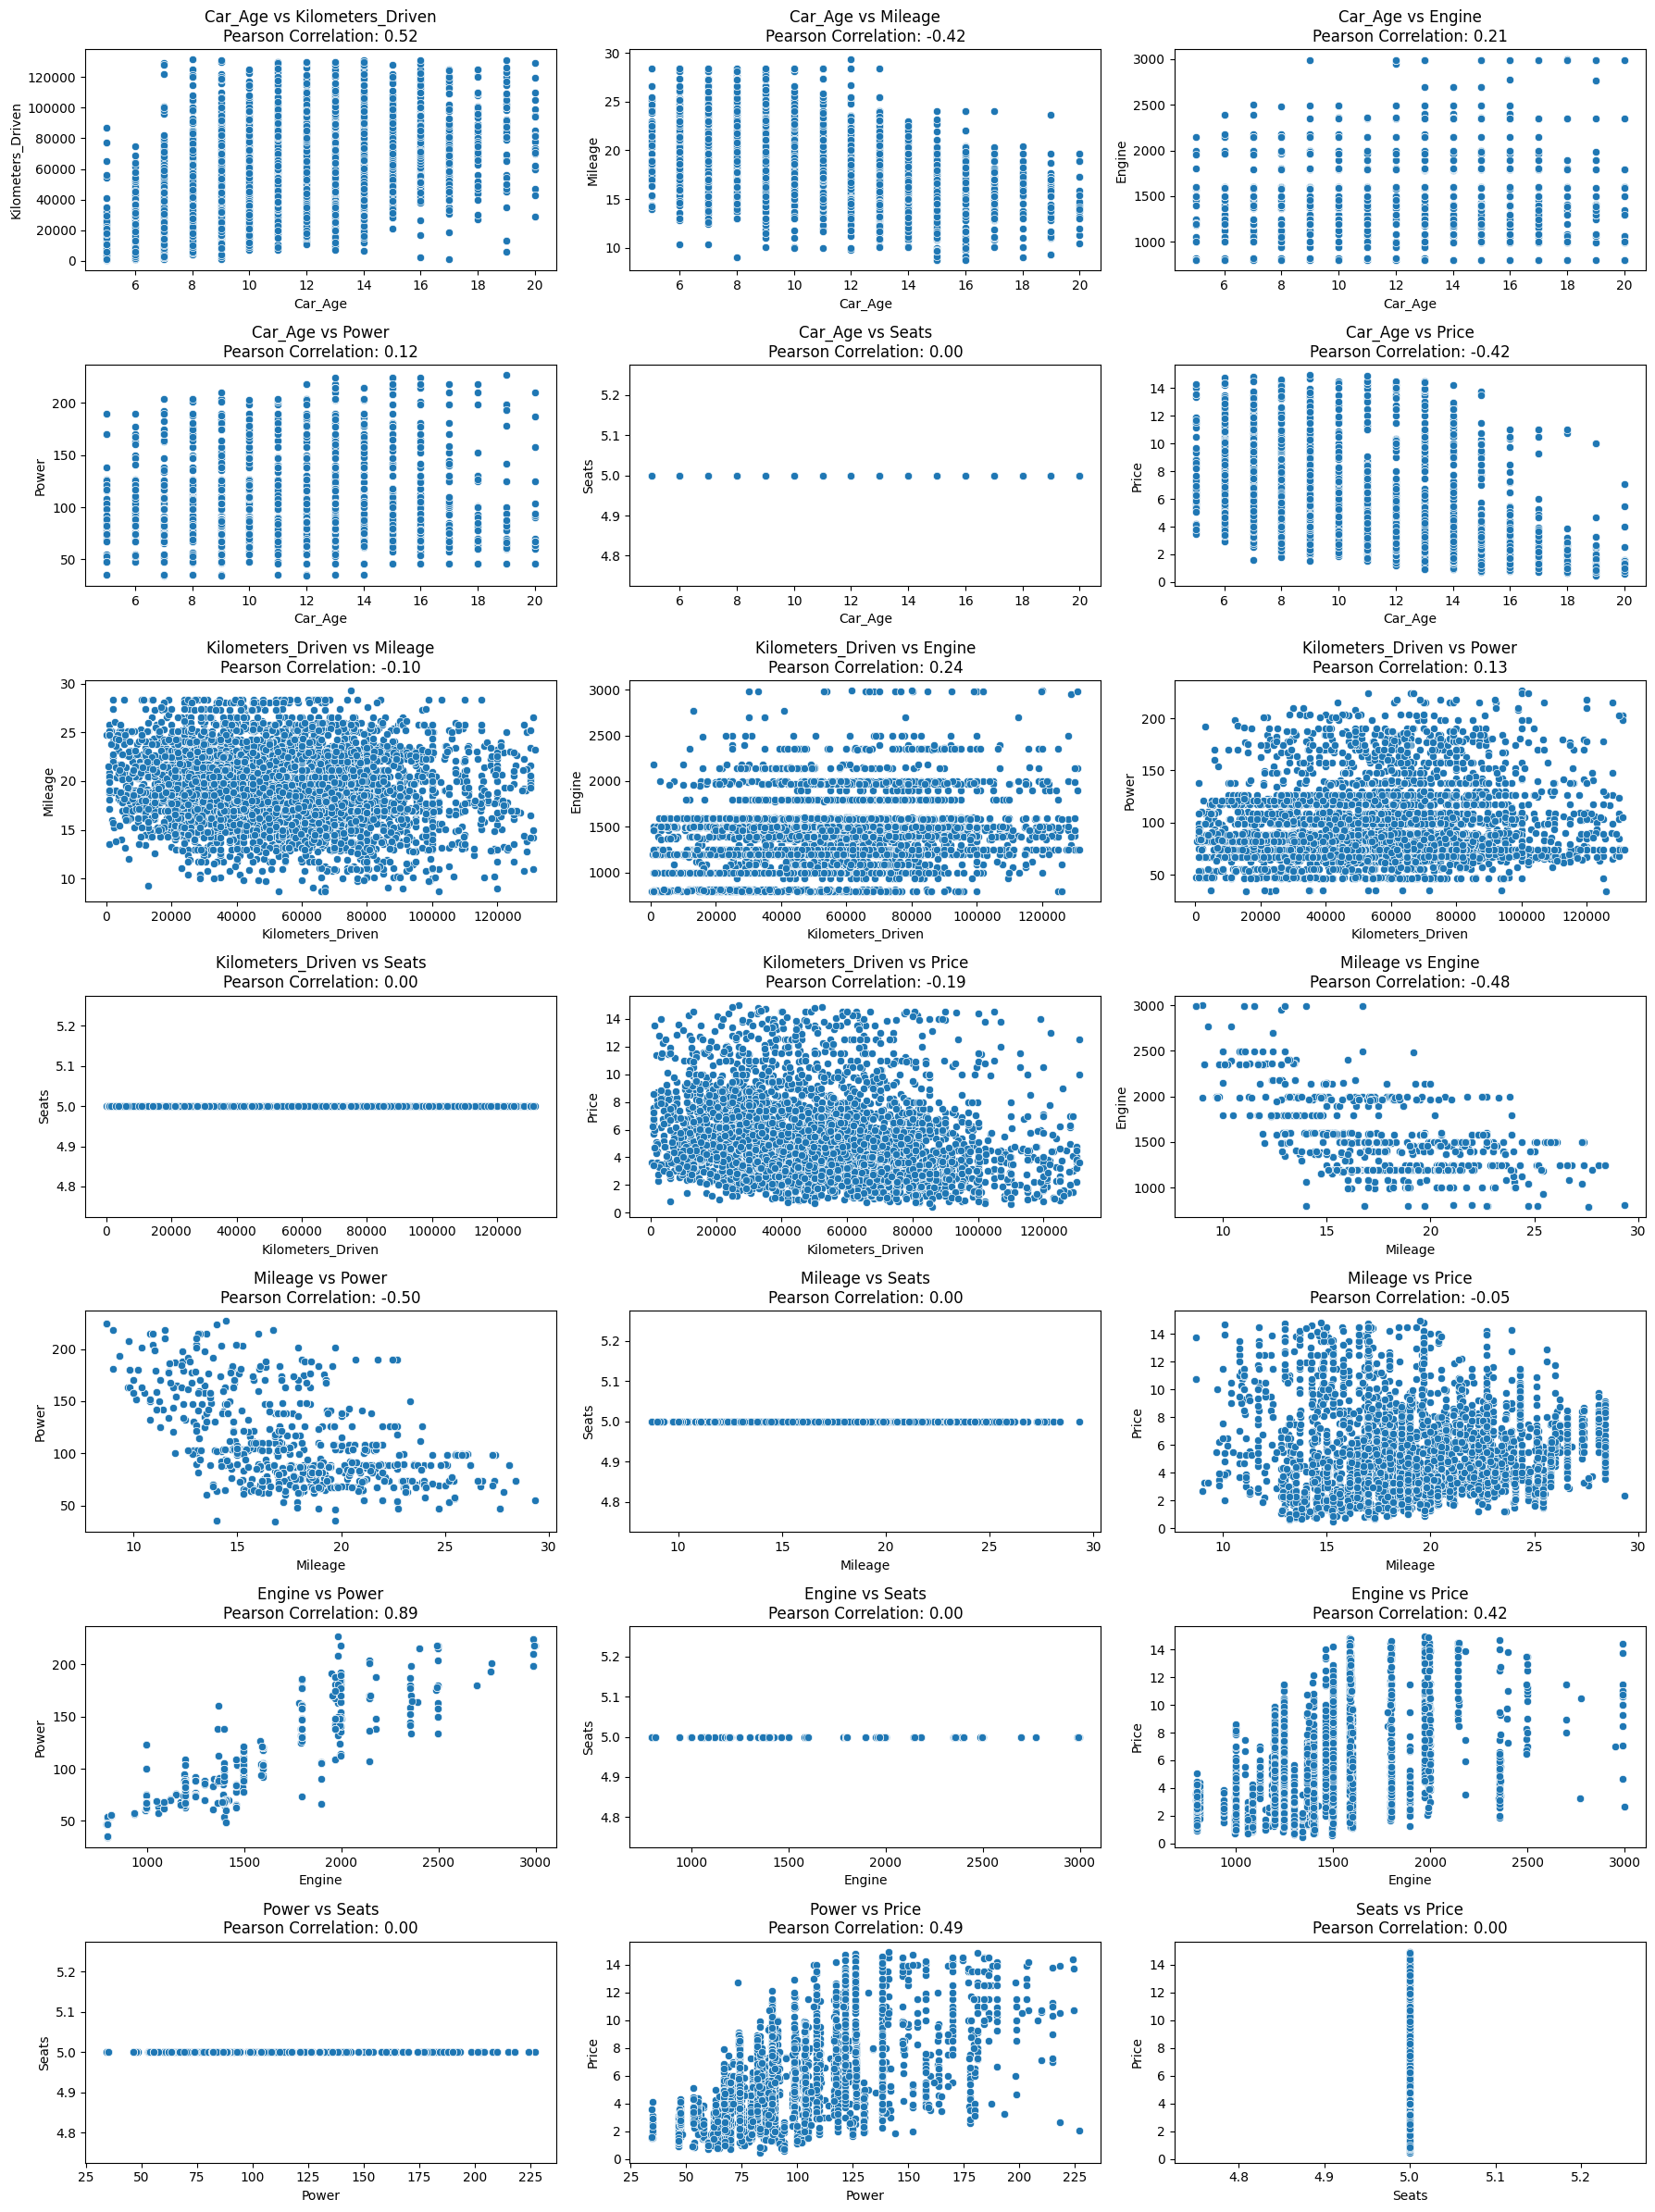

In [86]:
# List of numerical columns
NumColumns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Step 3: calculating Pearson correlation coefficient 
def pearson_corr_coeff(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    
    if denominator == 0: 
        return 0
    return numerator / denominator

# Step 4: Plot scatter plots with Pearson correlation coefficients in a grid
def plot_scatter_after_outliers(data):
    # Create a grid with 7 rows and 3 columns (21 plots total)
    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 24))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing
    
    plot_count = 0

    for i, col1 in enumerate(NumColumns):
        for col2 in NumColumns[i+1:]:
            if plot_count < 21:
                x = data[col1]
                y = data[col2]
                corr_coeff = pearson_corr_coeff(x, y)
                
                sns.scatterplot(x=x, y=y, ax=axes[plot_count])
                axes[plot_count].set_title(f'{col1} vs {col2}\nPearson Correlation: {corr_coeff:.2f}')
                axes[plot_count].set_xlabel(col1)
                axes[plot_count].set_ylabel(col2)
                
                plot_count += 1

    # Adjust layout to avoid overlapping titles and labels
    plt.tight_layout()
    plt.show()

# Call the function with your filtered dataframe
plot_scatter_after_outliers(df_filtered)

In [87]:
# Checking for missing values in the dataset 
missing_values = df_filtered.isnull().sum()

# Displaying outlier counts and missing values
missing_values

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                29
Power                109
Seats                 34
Price                968
Car_Age                0
dtype: int64

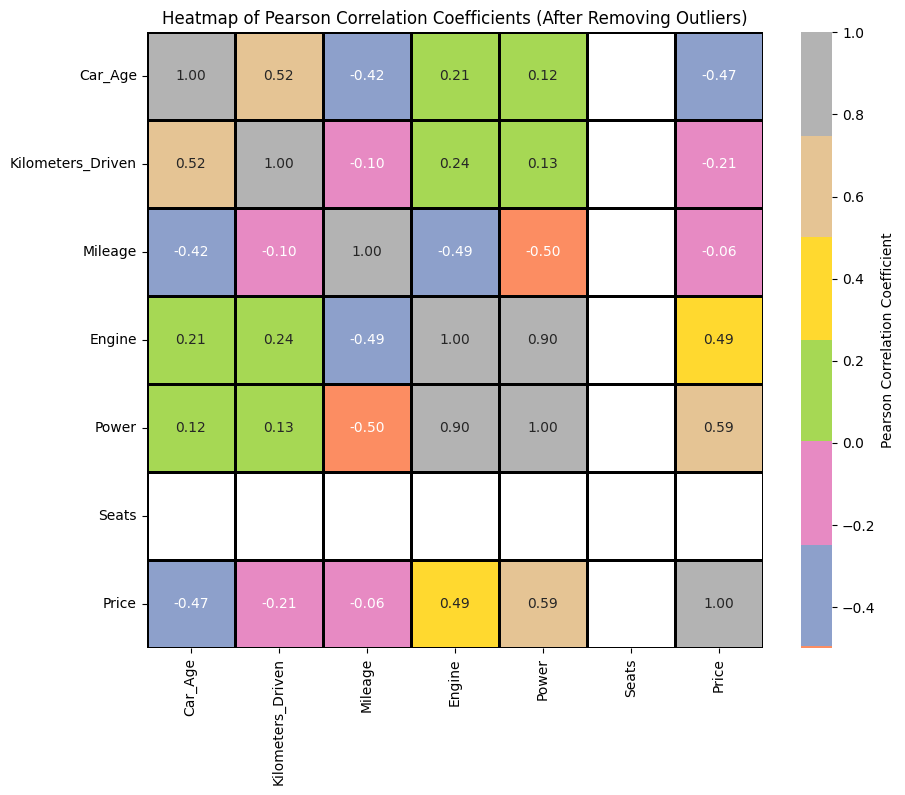

In [88]:
# plotting the heatmap 

# Calculate the Pearson correlation matrix after the outliers removal
pearson_corr_matrix = df_filtered[NumColumns].corr()

#  heatmap for the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix,annot=True,cmap='Set2',center=0,fmt=".2f",linewidths=1,cbar=True, square=True, linecolor='black', cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title("Heatmap of Pearson Correlation Coefficients (After Removing Outliers)")
plt.show()

This is the heat map for the pearson correlation coefficients for the columns car_age, Kilometer_driven, Mileage, Engine, power, Seats, Price. 

1. we can see from the heatmap there is positive correlation between power with price and kilometer driveen with carage. these have highest correlations. Positive corr shows that both the columns are highly positive correlated that means if one increases other one also increases. if one column values decreases other is also decrease. 
 For instance if car age is increasing kilometers driven value also increases. if it decreases the other one also decreases. 
2. Negative correlation is showing for power with Mileage and Engine with mileage. This means columns are negatively correlated with other column. If one column value decreases other column value increases and viceversa. 
For instance if power of the car increases, the mileage decrese and viceversa. 

In [90]:
# Function to detect and count outliers using IQR method for each column after calculating pearson corr coef and excluding outliers 
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers)

# Calculate outliers count for each numerical column after handling them
outliers_count_after_handling = {col: count_outliers(df_filtered, col) for col in NumColumns}

# Print the count of outliers for each column
print("Outliers count after handling:")
for col, count in outliers_count_after_handling.items():
    print(f"{col}: {count}")

Outliers count after handling:
Car_Age: 0
Kilometers_Driven: 35
Mileage: 11
Engine: 477
Power: 322
Seats: 0
Price: 176


We have calculated the outlier values count after excluding the outliers for the previous data . Even if we remove outliers , for the new data there will be new outliers again for the data. 

## Part 5: Handling missing values

In [93]:
df_filtered.shape

(5079, 13)

In [94]:
df.shape

(7253, 13)

In [95]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Displaying outlier counts and missing values
missing_values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
dtype: int64

### 5.1 There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please treat the outliers also as missing values.

<AxesSubplot:>

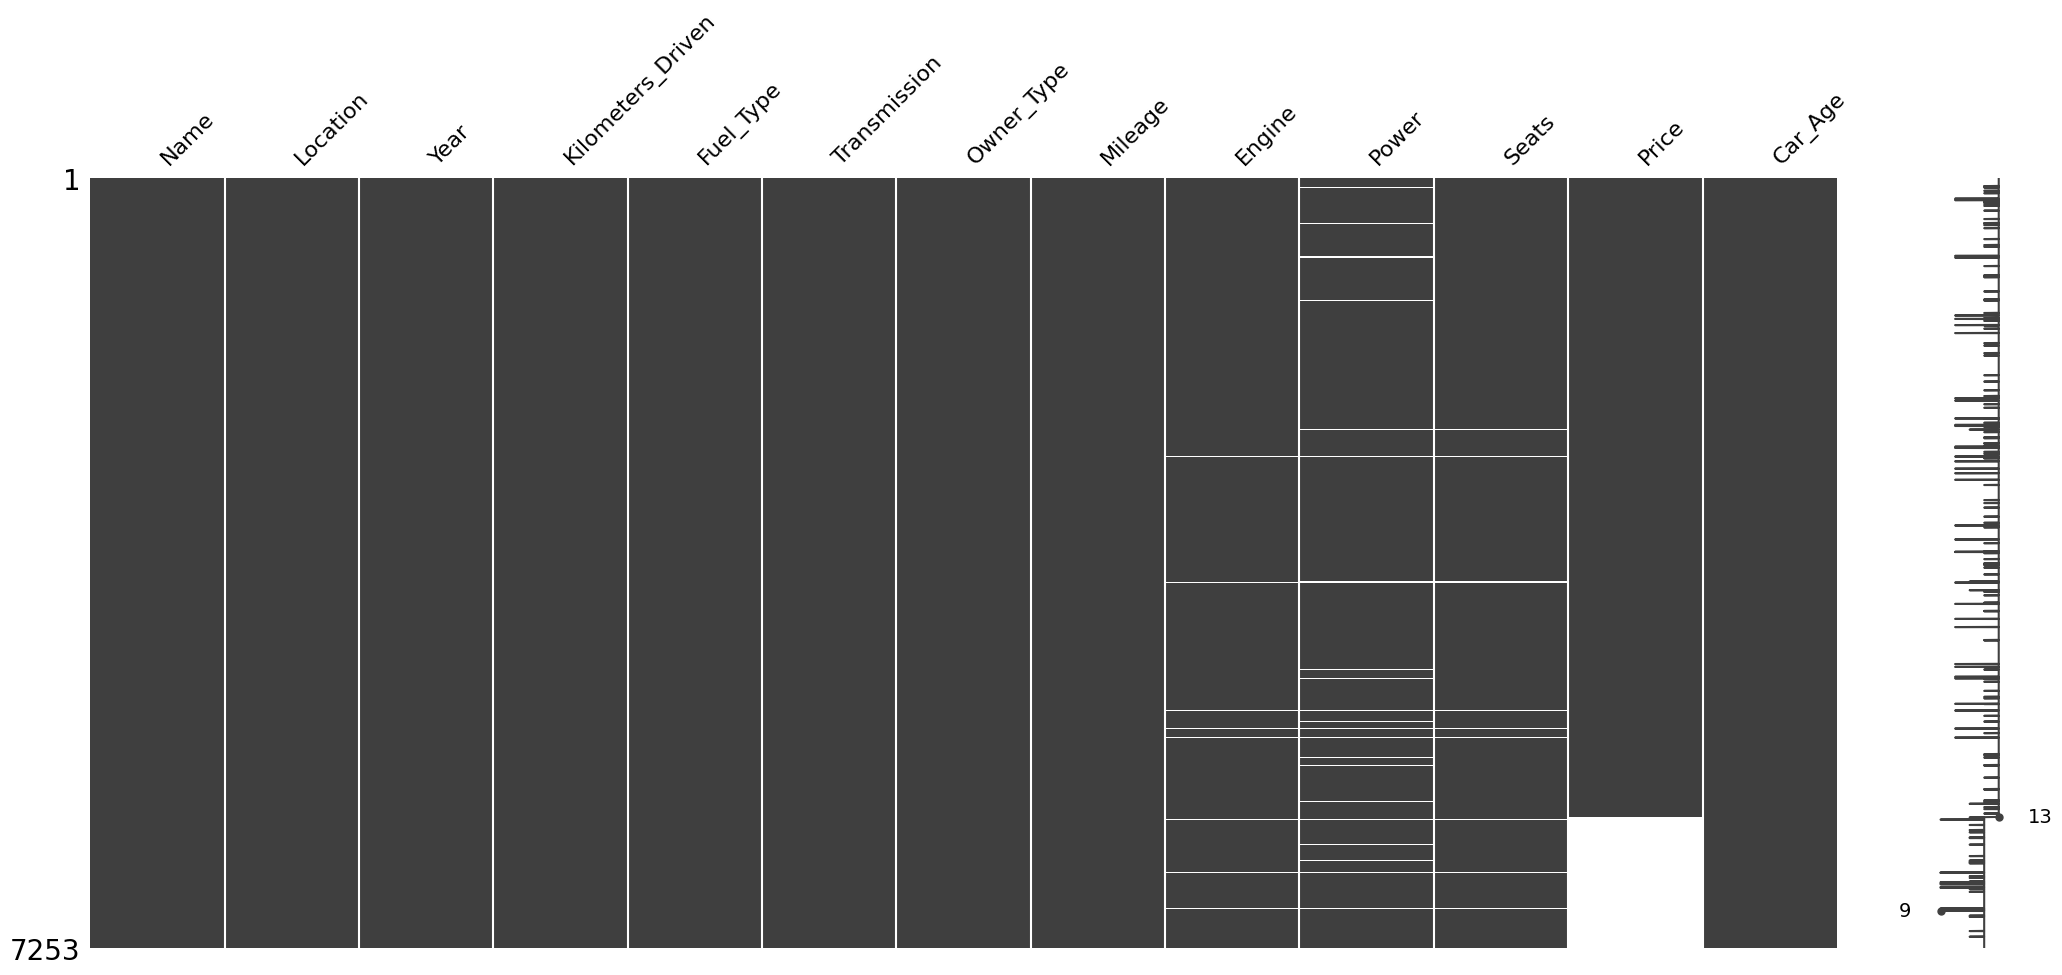

In [97]:
#Missing values matrix 

import missingno as msno

msno.matrix(df)

In [98]:
# Function to detect outliers using the IQR method 
def treat_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Treating outliers as missing values using np.where
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), np.nan, data[col])

columns_with_outliers_and_missing = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']

for col in columns_with_outliers_and_missing:
    treat_outliers(df, col)

# Check for missing values
missing_values_after_outlier_treatment = df[columns_with_outliers_and_missing].isnull().sum()

# Print the count of missing values after treating outliers as NaN
print("Missing values after converting outliers as missing values :")
print(missing_values_after_outlier_treatment)

Missing values after converting outliers as missing values :
Mileage     133
Engine      111
Power       448
Seats      1206
Price      1952
dtype: int64


<AxesSubplot:>

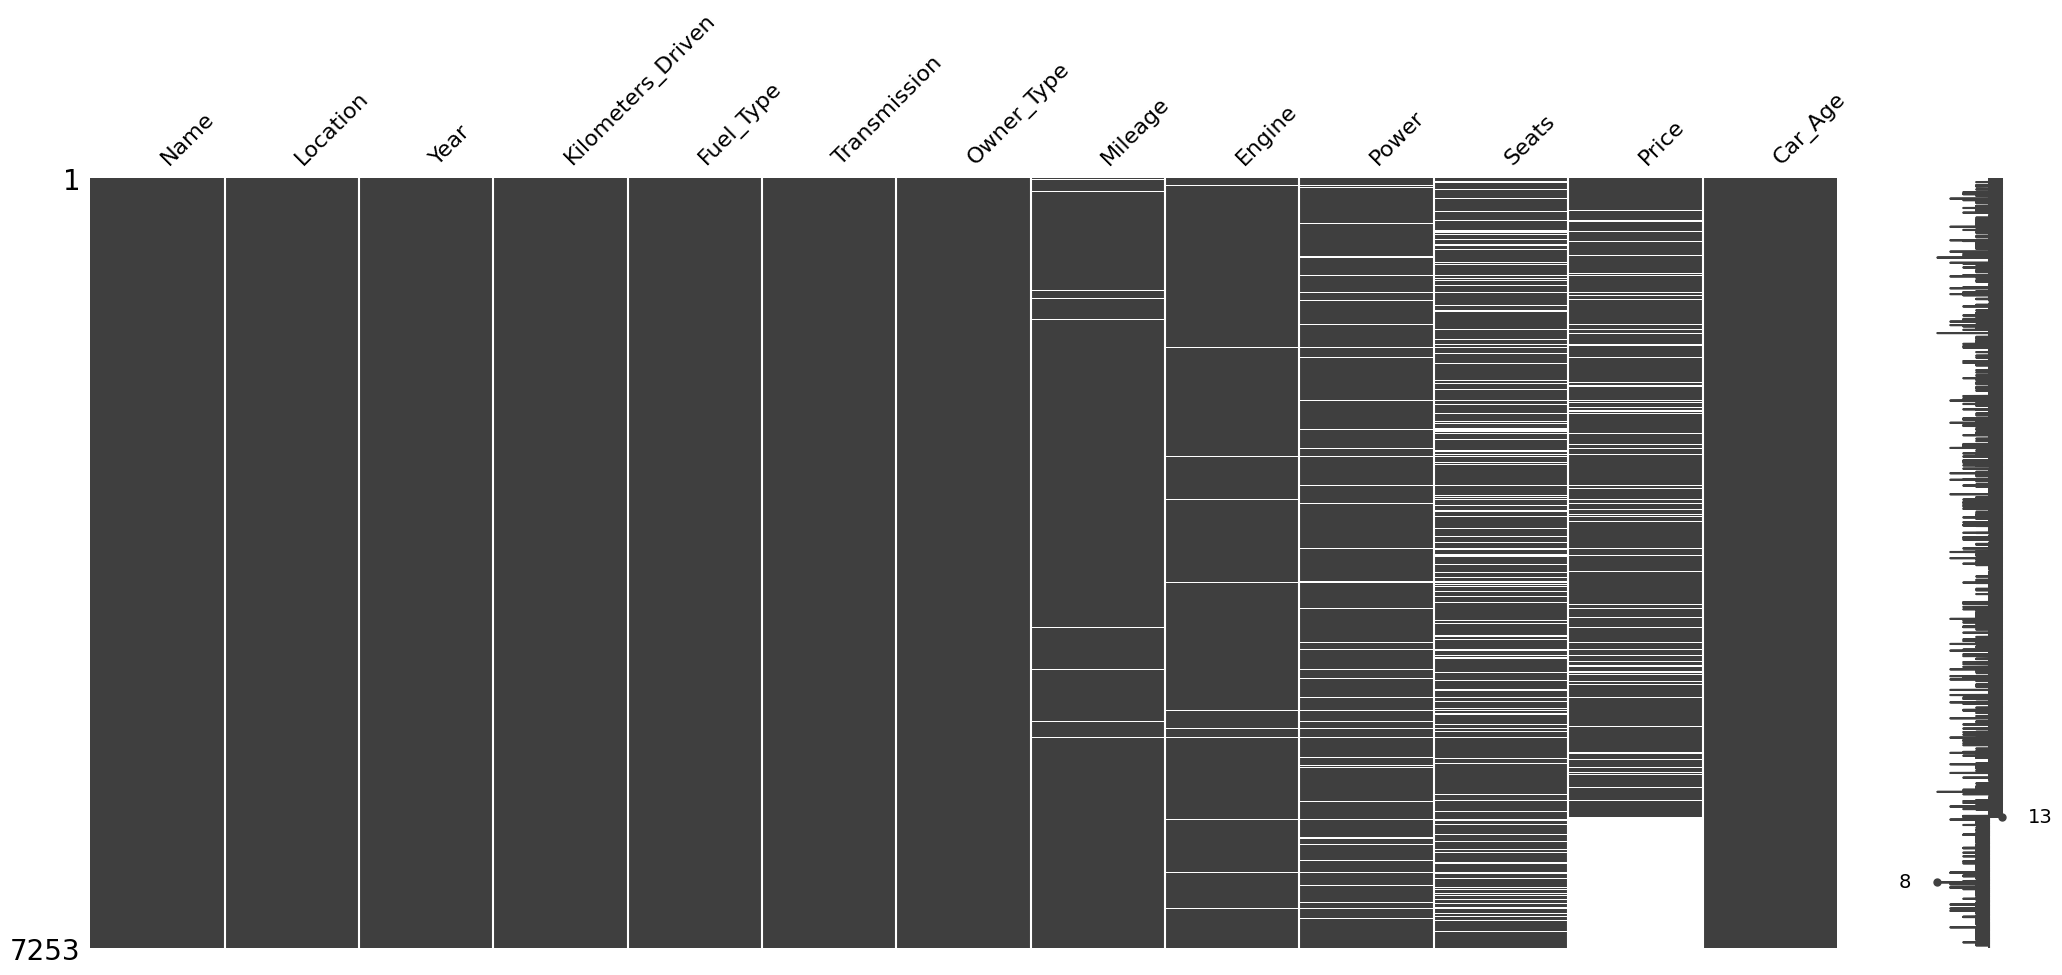

In [99]:
#Missing values matrix after considering Outliers and NaN as missing values

msno.matrix(df)

In [100]:
# Create a new column 'Brand' from the first word in the 'Name' column
df['Brand'] = df['Name'].str.split().str[0]

# Create a new column 'Model' from the second and third words in the 'Name' column 
df['Model'] = df['Name'].str.split().str[1:3].apply(lambda x: ' '.join(x))

df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,NaN,998.0,58.16,5.0,1.75,14,Maruti,Wagon R


### 5.2 Please count(print) missing values for each column in the columns of ‘Engine’, ‘Power’, and ‘Seats’. Please impute the missing values based on subclass (subgroups).

In [102]:
# Check the missing values count for 'Engine', 'Power', and 'Seats'
missing_values_before_imputation = df[['Engine', 'Power', 'Seats']].isnull().sum()

# Print missing values before imputation
print("Missing values before imputation:")
print(missing_values_before_imputation)

Missing values before imputation:
Engine     111
Power      448
Seats     1206
dtype: int64


1. Seats is the discrete variable. it is not continuous therefore we can impute the missing values using mode. 
2. Power and engine are continuous variables. Therefore impute by the mean value based on the grouping of subclasses like brand and model. 

In [104]:
# impute missing values based on Brand and Model for discrete features (Seats)
def impute_mode(data, col):
    data[col] = data.groupby(['Brand', 'Model'])[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Function to impute missing values based on Brand and Model for continuous features (Engine, Power)
def impute_mean(data, col):
    data[col] = data.groupby(['Brand', 'Model'])[col].transform(lambda x: x.fillna(x.mean()))

df['Imputed_Engine'] = np.where(df['Engine'].isnull(), 1, 0)
df['Imputed_Power'] = np.where(df['Power'].isnull(), 1, 0)
df['Imputed_Seats'] = np.where(df['Seats'].isnull(), 1, 0)

# impute the missing values 
impute_mode(df, 'Seats')
impute_mean(df, 'Engine')
impute_mean(df, 'Power')

# Check for any remaining missing values after subgroup imputation
missing_values_after_imputation = df[['Engine', 'Power', 'Seats']].isnull().sum()

# Print missing values after subgroup imputation
print("Missing values after subgroup imputation:")
print(missing_values_after_imputation)

Missing values after subgroup imputation:
Engine      62
Power      273
Seats     1126
dtype: int64


with the imputation using mean and mode it didnot imputed all the missing values using subgroups brand and model. So we have taken the global constant and then imputed the left missing values

In [106]:
# Imputing the remaining missing values using global constant

df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])  
df['Engine'] = df['Engine'].fillna(df['Engine'].mean()) 
df['Power'] = df['Power'].fillna(df['Power'].mean())     


# final count of missing values after global imputation
missing_values_final = df[['Engine', 'Power', 'Seats']].isnull().sum()

# Print the final missing values count
print("missing values count after imputation:")
print(missing_values_final)

missing values count after imputation:
Engine    0
Power     0
Seats     0
dtype: int64


<AxesSubplot:>

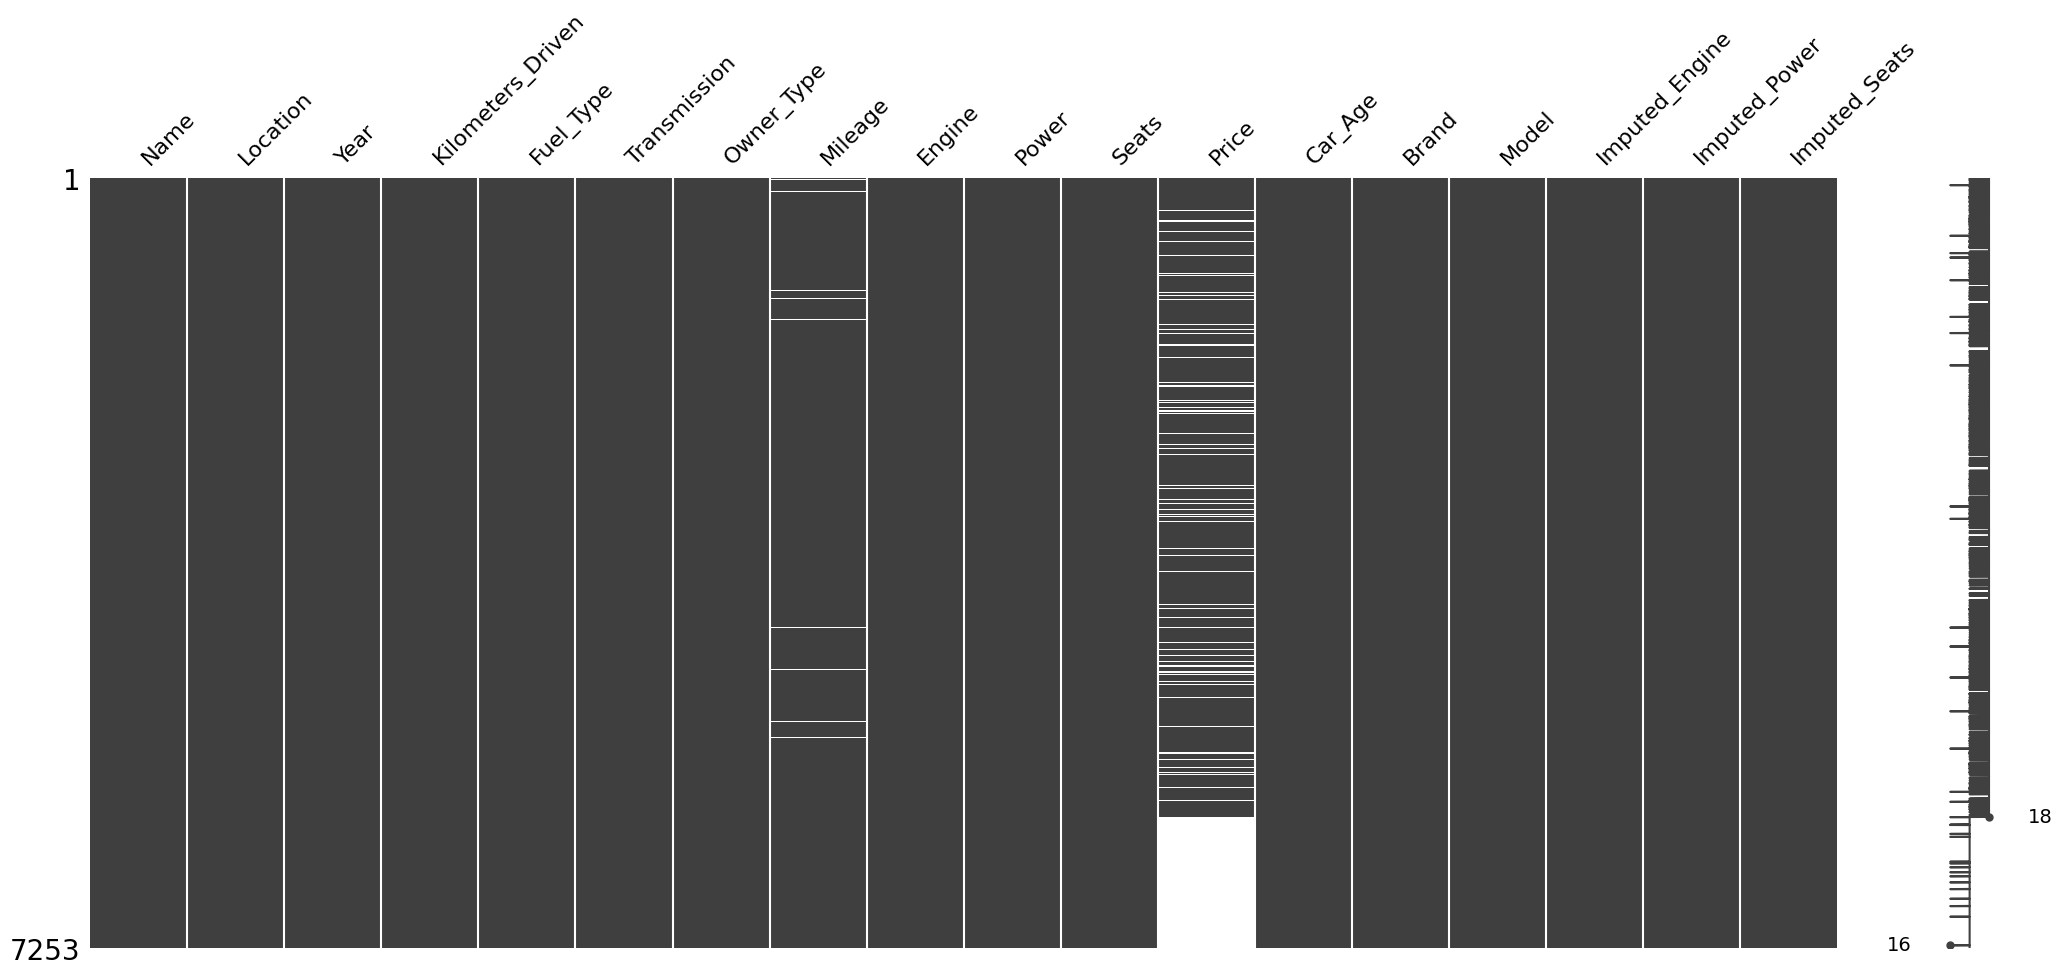

In [107]:
#Missing values matrix after imputing values for 'Engine', 'Power', and 'Seats'

msno.matrix(df)

In [108]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,Imputed_Engine,Imputed_Power,Imputed_Seats
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,NaN,998.0,58.16,5.0,1.75,14,Maruti,Wagon R,0,0,0


### 5.3 Please draw histogram(distribution) for each column and use different color for the imputed missing values.

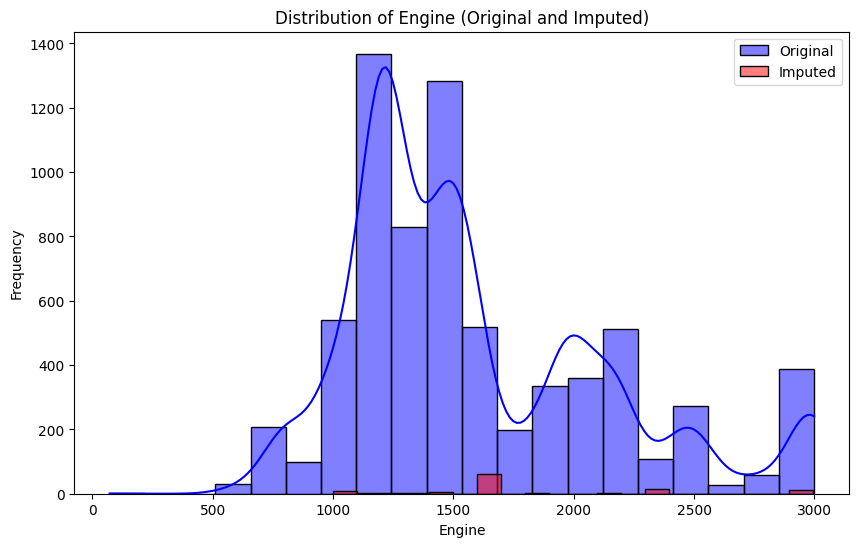

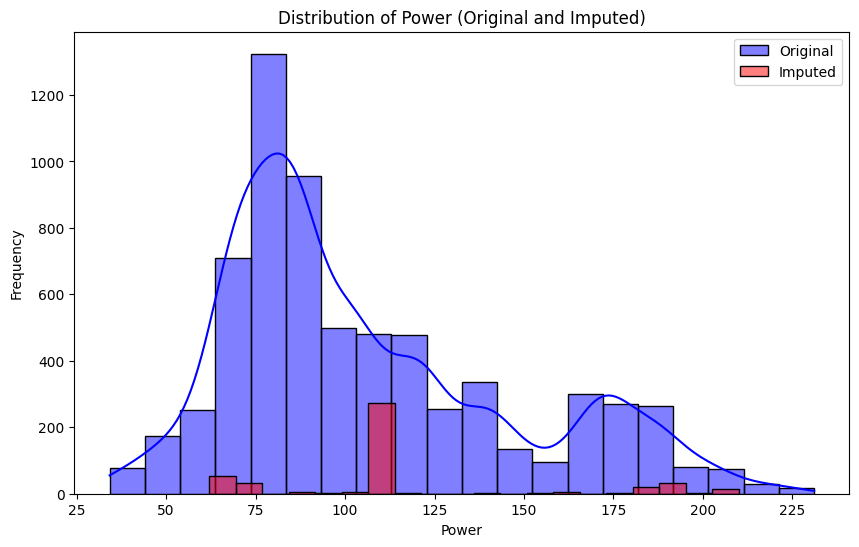

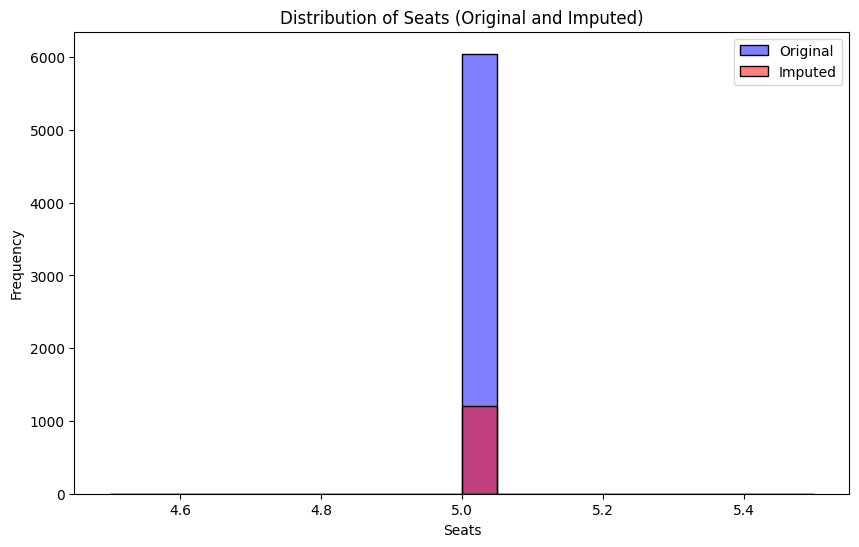

In [110]:
# Plot histograms for each column showing original vs imputed values
for column, imputed_col in [('Engine', 'Imputed_Engine'), ('Power', 'Imputed_Power'), ('Seats', 'Imputed_Seats')]:
    plt.figure(figsize=(10, 6))
    
    # original values 
    sns.histplot(df[df[imputed_col] == 0][column], bins=20, alpha=0.5, label='Original', color='blue',kde=True)
    
    # imputed values 
    sns.histplot(df[df[imputed_col] == 1][column], bins=20, alpha=0.5, label='Imputed', color='red')
    
    plt.title(f'Distribution of {column} (Original and Imputed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

### 5.4 Please count(print) missing values for each column in the columns of ‘Mileage’ and ‘Price’.

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Count missing values for 'mileage' and 'price'

missing_mileage = df['Mileage'].isnull().sum()
missing_price = df['Price'].isnull().sum()

print(f"Missing values in 'Mileage': {missing_mileage}")
print(f"Missing values in 'Price': {missing_price}")

Missing values in 'Mileage': 133
Missing values in 'Price': 1952


### 5.5 Please impute the missing values using linear regression. 

In [114]:
correlations= df[NumColumns].corr()

In [115]:
print("\nCorrelations with Mileage:\n", correlations['Mileage'].sort_values(ascending=False))
print("\nCorrelations with Price:\n", correlations['Price'].sort_values(ascending=False))


Correlations with Mileage:
 Mileage              1.000000
Kilometers_Driven   -0.070611
Price               -0.254358
Car_Age             -0.303537
Power               -0.522454
Engine              -0.636251
Seats                     NaN
Name: Mileage, dtype: float64

Correlations with Price:
 Price                1.000000
Power                0.683498
Engine               0.611612
Kilometers_Driven   -0.061374
Mileage             -0.254358
Car_Age             -0.361476
Seats                     NaN
Name: Price, dtype: float64


In [116]:
#Prepare the dataset by excluding rows where 'Mileage' is missing for training
mileage_not_null = df[df['Mileage'].notnull()]
mileage_null = df[df['Mileage'].isnull()]

# Identify the feature columns that have a strong correlation with 'Mileage' 

MileageFeatures = ['Engine', 'Power','Car_Age']  

# Train-test split for 'Mileage'
X_mileage = mileage_not_null[MileageFeatures]
y_mileage = mileage_not_null['Mileage']

# Linear Regression model for 'Mileage'
lr_model = LinearRegression()
lr_model.fit(X_mileage, y_mileage)

# Predict the missing 'Mileage' values
X_mileage_null = mileage_null[MileageFeatures]
predicted_mileage = lr_model.predict(X_mileage_null)

df['Mileage_Imputed'] = np.where(df['Mileage'].isnull(), 1, 0)

# Fill the predicted values instead of missing 'Mileage' values
df.loc[df['Mileage'].isnull(), 'Mileage'] = predicted_mileage

In [117]:
# Impute 'Price' using Linear Regression

#Prepare the dataset by excluding rows where 'Price' is missing for training
price_not_null = df[df['Price'].notnull()]
price_null = df[df['Price'].isnull()]

# Identify the columns that have a strong correlation with 'Price'

PriceFeatures =['Engine', 'Power','Car_Age']  

# Train-test split for 'Price'
X_price = price_not_null[PriceFeatures]
y_price = price_not_null['Price']

# Linear Regression model for 'Price'
lr_price_model = LinearRegression()
lr_price_model.fit(X_price, y_price)

# Predict the missing 'Price' values
X_price_null = price_null[PriceFeatures]
predicted_price = lr_price_model.predict(X_price_null)

df['Price_Imputed'] = np.where(df['Price'].isnull(), 1, 0)

# fill the predicted values in place of missing 'Price' values
df.loc[df['Price'].isnull(), 'Price'] = predicted_price

In [118]:
#updated DataFrame with imputed values

df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,Imputed_Engine,Imputed_Power,Imputed_Seats,Mileage_Imputed,Price_Imputed
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,20.148067,998.0,58.16,5.0,1.75,14,Maruti,Wagon R,0,0,0,1,0


<AxesSubplot:>

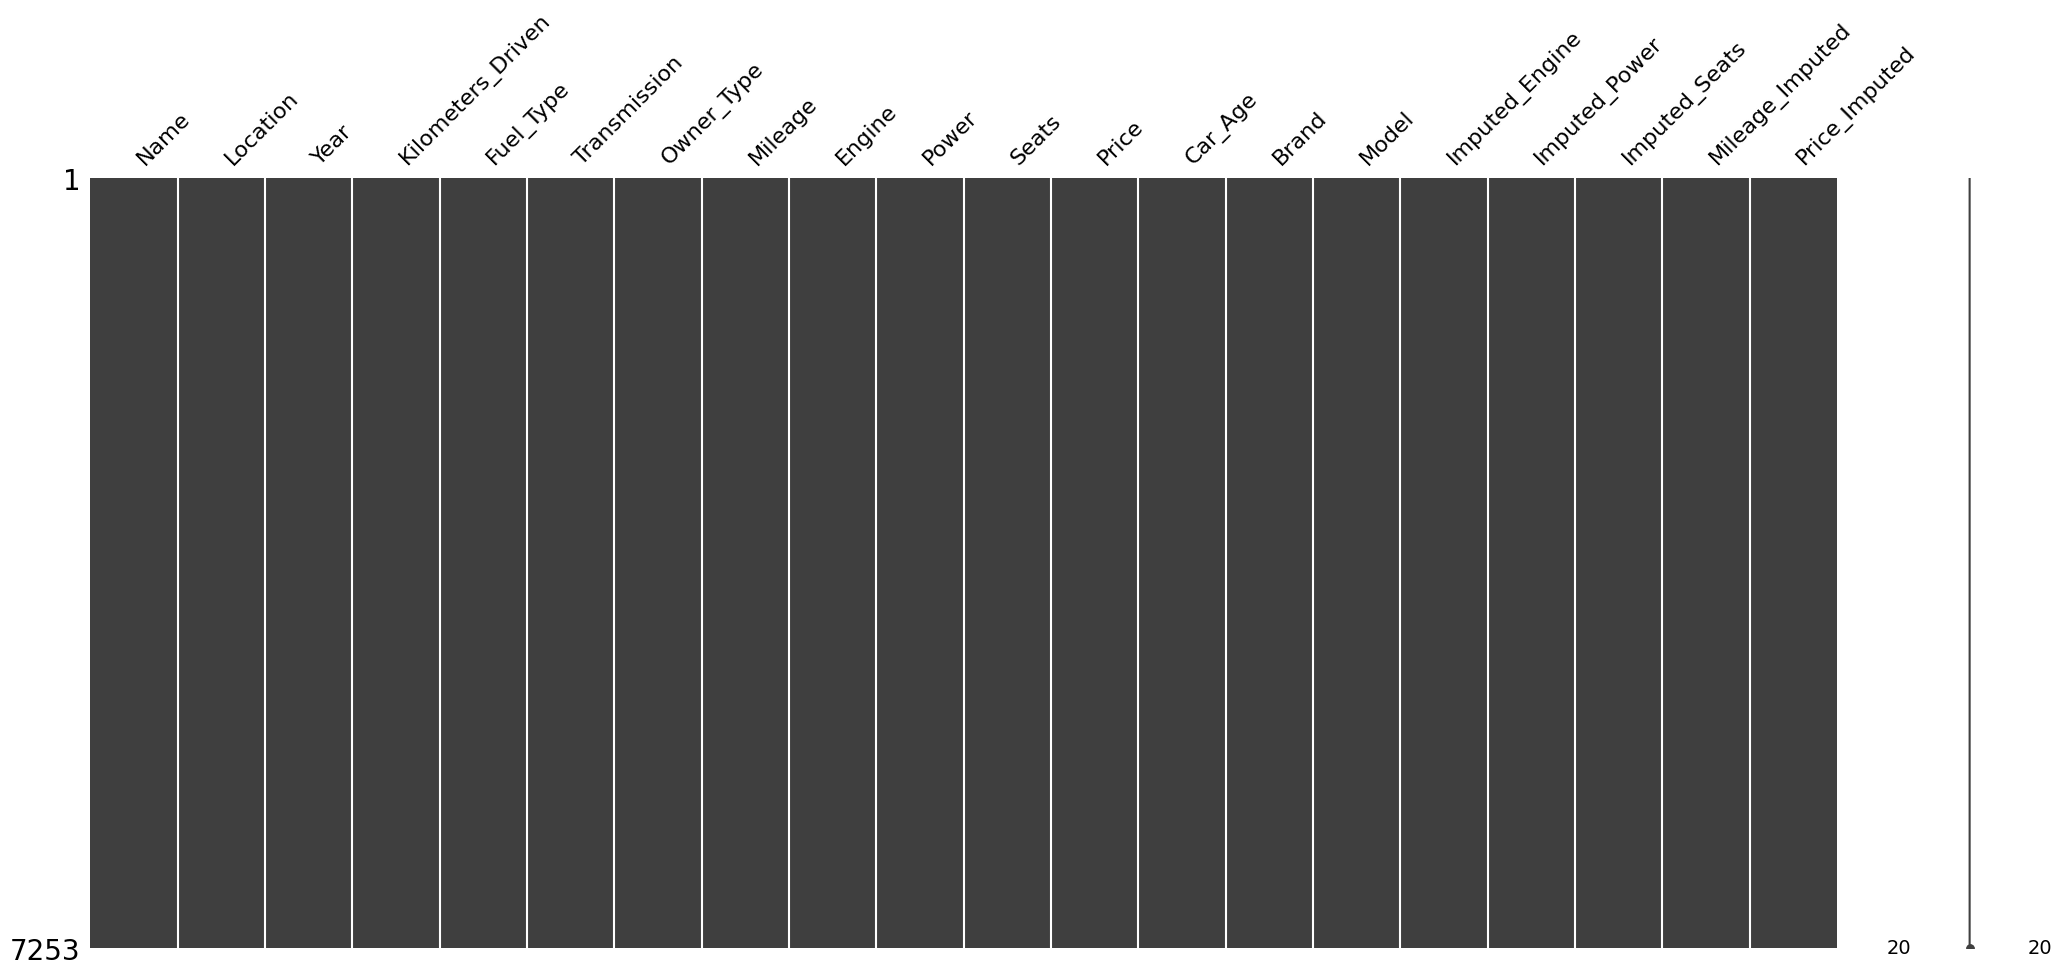

In [119]:
#Missing values matrix after imputing values for 'mileage' and 'price'

msno.matrix(df)

### 5.6 Please draw histogram(distribution) for each column and use different color for the imputed missing values

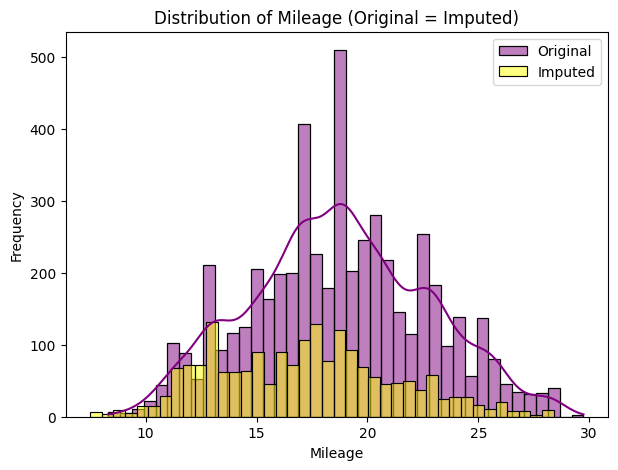

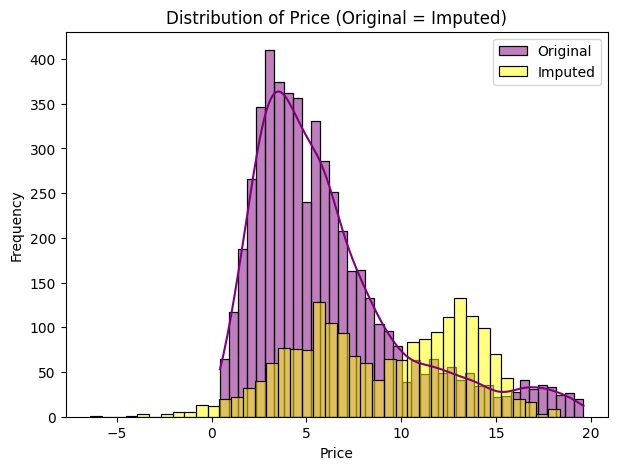

In [121]:
#histograms for 'Mileage' and 'Price' 

# Plot histograms for 'Mileage' and 'Price' showing original vs imputed values
for column, imputed_col in [('Mileage', 'Price_Imputed'), ('Price', 'Price_Imputed')]:
    plt.figure(figsize=(7, 5))
    
    # Plot original values (those that were not imputed)
    sns.histplot(df[df[imputed_col] == 0][column], bins=40, alpha=0.5, label='Original', color='purple', kde=True)
    
    # Plot imputed values (those that were imputed)
    sns.histplot(df[df[imputed_col] == 1][column], bins=40, alpha=0.5, label='Imputed', color='yellow')
    
    plt.title(f'Distribution of {column} (Original = Imputed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()